In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
covid19=pd.read_csv('COVID19 Hackathon Dataset columns.csv')
covid19['Date']=pd.to_datetime(covid19['Date'], format='%Y-%m-%d')
#from https://rsf.org/en/ranking_table
freedom_press=pd.read_csv('2020_press_freedom.csv', decimal=',')
freedom_press=freedom_press[['EN_country','Score 2020']]
covid19=pd.merge(covid19,freedom_press,left_on='Countries',right_on='EN_country',how='left',suffixes=('',''))
#only keeping countries : United States, Brazil, Russia, India, United Kingdom, Italy, New Zealand, Sweden, South Africa, Iran
covid19=covid19[(covid19['Countries']=='United States') | (covid19['Countries']=='Brazil') | (covid19['Countries']=='Russia') | (covid19['Countries']=='India') | (covid19['Countries']=='United Kingdom') | (covid19['Countries']=='Italy') | (covid19['Countries']=='New Zealand') | (covid19['Countries']=='Sweden') | (covid19['Countries']=='South Africa') | (covid19['Countries']=='Iran')]

If necessary I could fixed the names of the countries that are not originally written the same in the 2 files :
* Antigua and Barbuda
* Bahamas
* Barbados
* Brunei
* Congo, Dem. Rep.
* Congo, Rep.
* Cote d'Ivoire
* Dominica
* Grenada
* Iran
* Kyrgyz Republic
* Lao
* Monaco
* Russia
* San Marino
* Sao Tome and Principe
* Slovak Republic
* St. Kitts and Nevis
* St. Lucia
* St. Vincent and the Grenadines
* Syria

(done on the file for russia and iran)

(from :prev=''
for i in range(len(covid19)):
    if pd.isna(covid19.loc[i]['EN_country']) and covid19.loc[i]['Countries']!=prev:
        print(covid19.loc[i]['Countries'])
        prev=covid19.loc[i]['Countries']
)

In [21]:
covid19.head()

,Date,Continent,Countries,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,Population_Density,...,Population,Population_Aged_65+_Percent,Urban_Population.1,Death_Rate_1000,Air_Pollution_Mean_Annual_Exposure,Air_Pollution_Exceeding_Guid,Hospital_Beds_Year,Hospital_Beds_Per_1000_People,EN_country,Score 2020
5424,2019-12-31,South America,Brazil,0.0,0.0,0.0,0.0,NaN,NaN,25.4,...,211049527.0,9.251608,183241641.0,6.378,12.706629,68.13503,2014.0,2.2,Brazil,"34,05"
5425,2020-01-01,South America,Brazil,0.0,0.0,0.0,0.0,NaN,NaN,25.4,...,211049527.0,9.251608,183241641.0,6.378,12.706629,68.13503,2014.0,2.2,Brazil,"34,05"
5426,2020-01-02,South America,Brazil,0.0,0.0,0.0,0.0,NaN,NaN,25.4,...,211049527.0,9.251608,183241641.0,6.378,12.706629,68.13503,2014.0,2.2,Brazil,"34,05"
5427,2020-01-03,South America,Brazil,0.0,0.0,0.0,0.0,NaN,NaN,25.4,...,211049527.0,9.251608,183241641.0,6.378,12.706629,68.13503,2014.0,2.2,Brazil,"34,05"
5428,2020-01-04,South America,Brazil,0.0,0.0,0.0,0.0,NaN,NaN,25.4,...,211049527.0,9.251608,183241641.0,6.378,12.706629,68.13503,2014.0,2.2,Brazil,"34,05"


In [22]:
continents=covid19.groupby(['Continent'])['Date'].aggregate(['min', 'max', 'nunique'])
countries=covid19.groupby(['Countries'])['Date'].aggregate(['min', 'max', 'count'])

### what is happening here ? why negative nbr of new cases/death : correction

## the total nbr of cases are the sums of new cases so they take into account 

In [28]:
covid19[covid19['New_Cases']<0] #1 in italy
covid19[covid19['New_Deaths']<0] # 1 in italy
covid19[covid19['Weekly_Cases']<0]
covid19[covid19['Weekly_Deaths']<0]

,Date,Continent,Countries,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,Population_Density,...,Population,Population_Aged_65+_Percent,Urban_Population.1,Death_Rate_1000,Air_Pollution_Mean_Annual_Exposure,Air_Pollution_Exceeding_Guid,Hospital_Beds_Year,Hospital_Beds_Per_1000_People,EN_country,Score 2020


### 'Total_Deaths'='RunTot_New_Deaths' and 'RunTot_New_Cases']='Total_Cases'

only difference is that 'Total_Deaths' has 276 nan when 'RunTot_New_Deaths' has values, same for 2nd one (on the same values)

In [45]:
covid19[covid19['Total_Deaths']!=covid19['RunTot_New_Deaths']][['Country','Total_Cases','Total_Deaths','RunTot_New_Cases','RunTot_New_Deaths']]
covid19[covid19['RunTot_New_Cases']!=covid19['Total_Cases']][['Country','Total_Cases','Total_Deaths','RunTot_New_Cases','RunTot_New_Deaths']]

,Country,Total_Cases,Total_Deaths,RunTot_New_Cases,RunTot_New_Deaths
17454,India,NaN,NaN,34,0
27322,New Zealand,NaN,NaN,1,0
27327,New Zealand,NaN,NaN,5,0
27328,New Zealand,NaN,NaN,5,0
27329,New Zealand,NaN,NaN,5,0
27330,New Zealand,NaN,NaN,5,0
27331,New Zealand,NaN,NaN,5,0
27332,New Zealand,NaN,NaN,5,0
27335,New Zealand,NaN,NaN,8,0
27336,New Zealand,NaN,NaN,8,0


<AxesSubplot:>

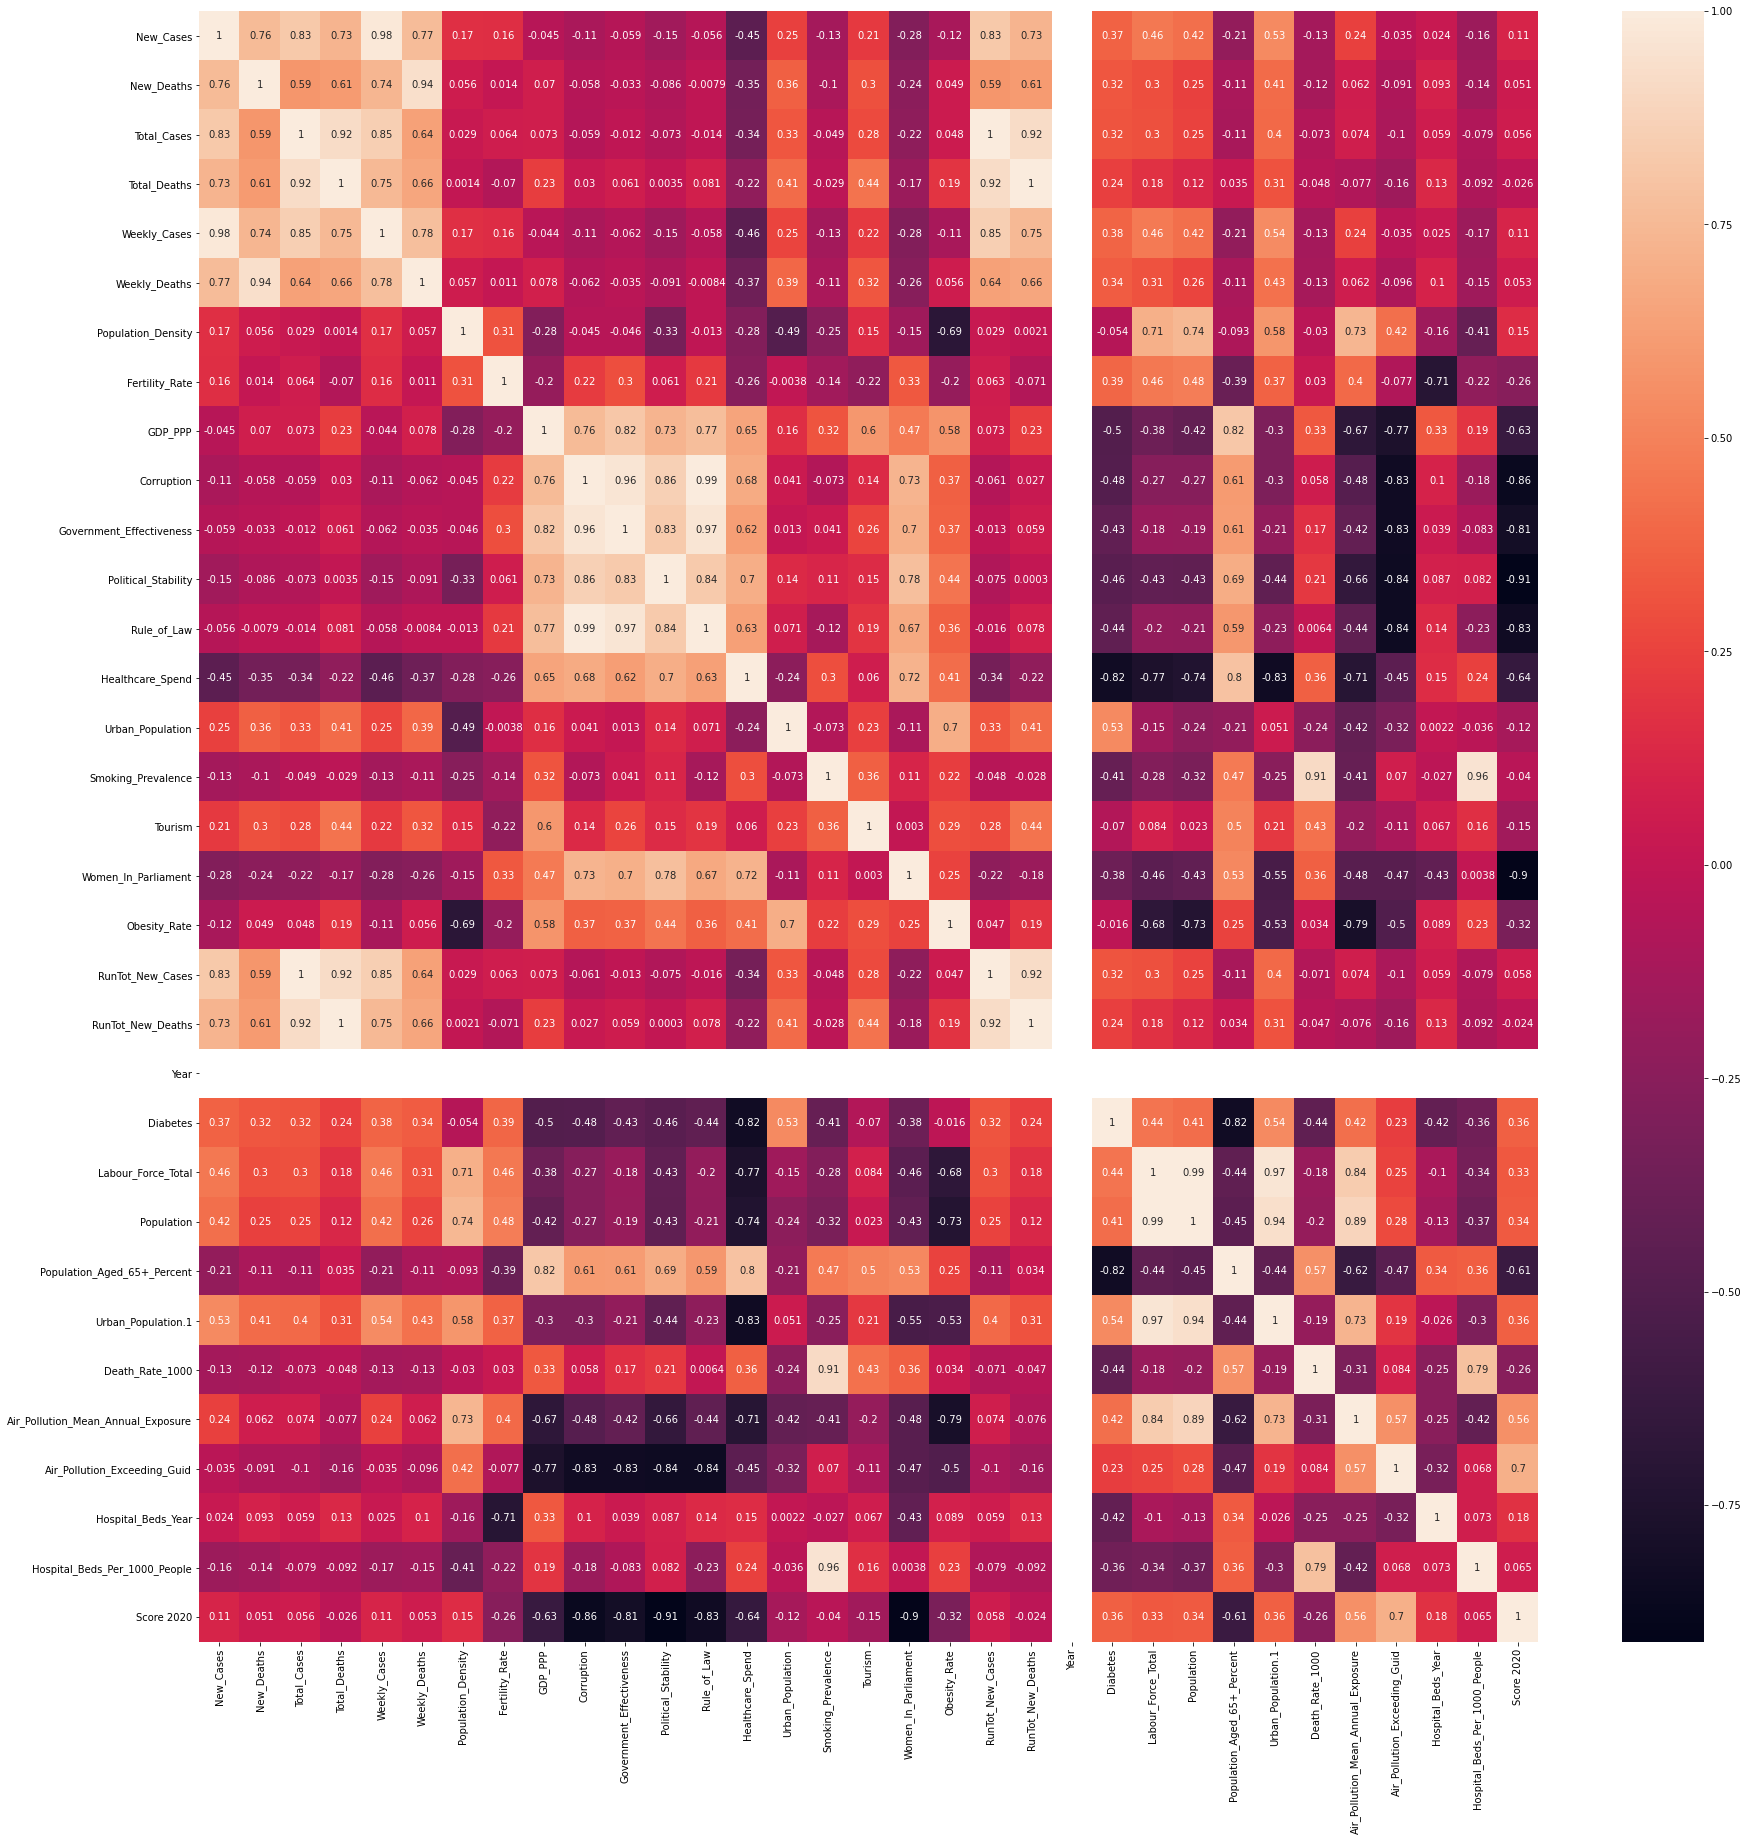

In [38]:
correlation = covid19.corr()
correlation[abs(correlation)>0.5] #nothing much
plt.figure(figsize=(30,30)) 
sns.heatmap(correlation, annot=True)
#correlation.style.background_gradient(cmap='Blues')

<AxesSubplot:>

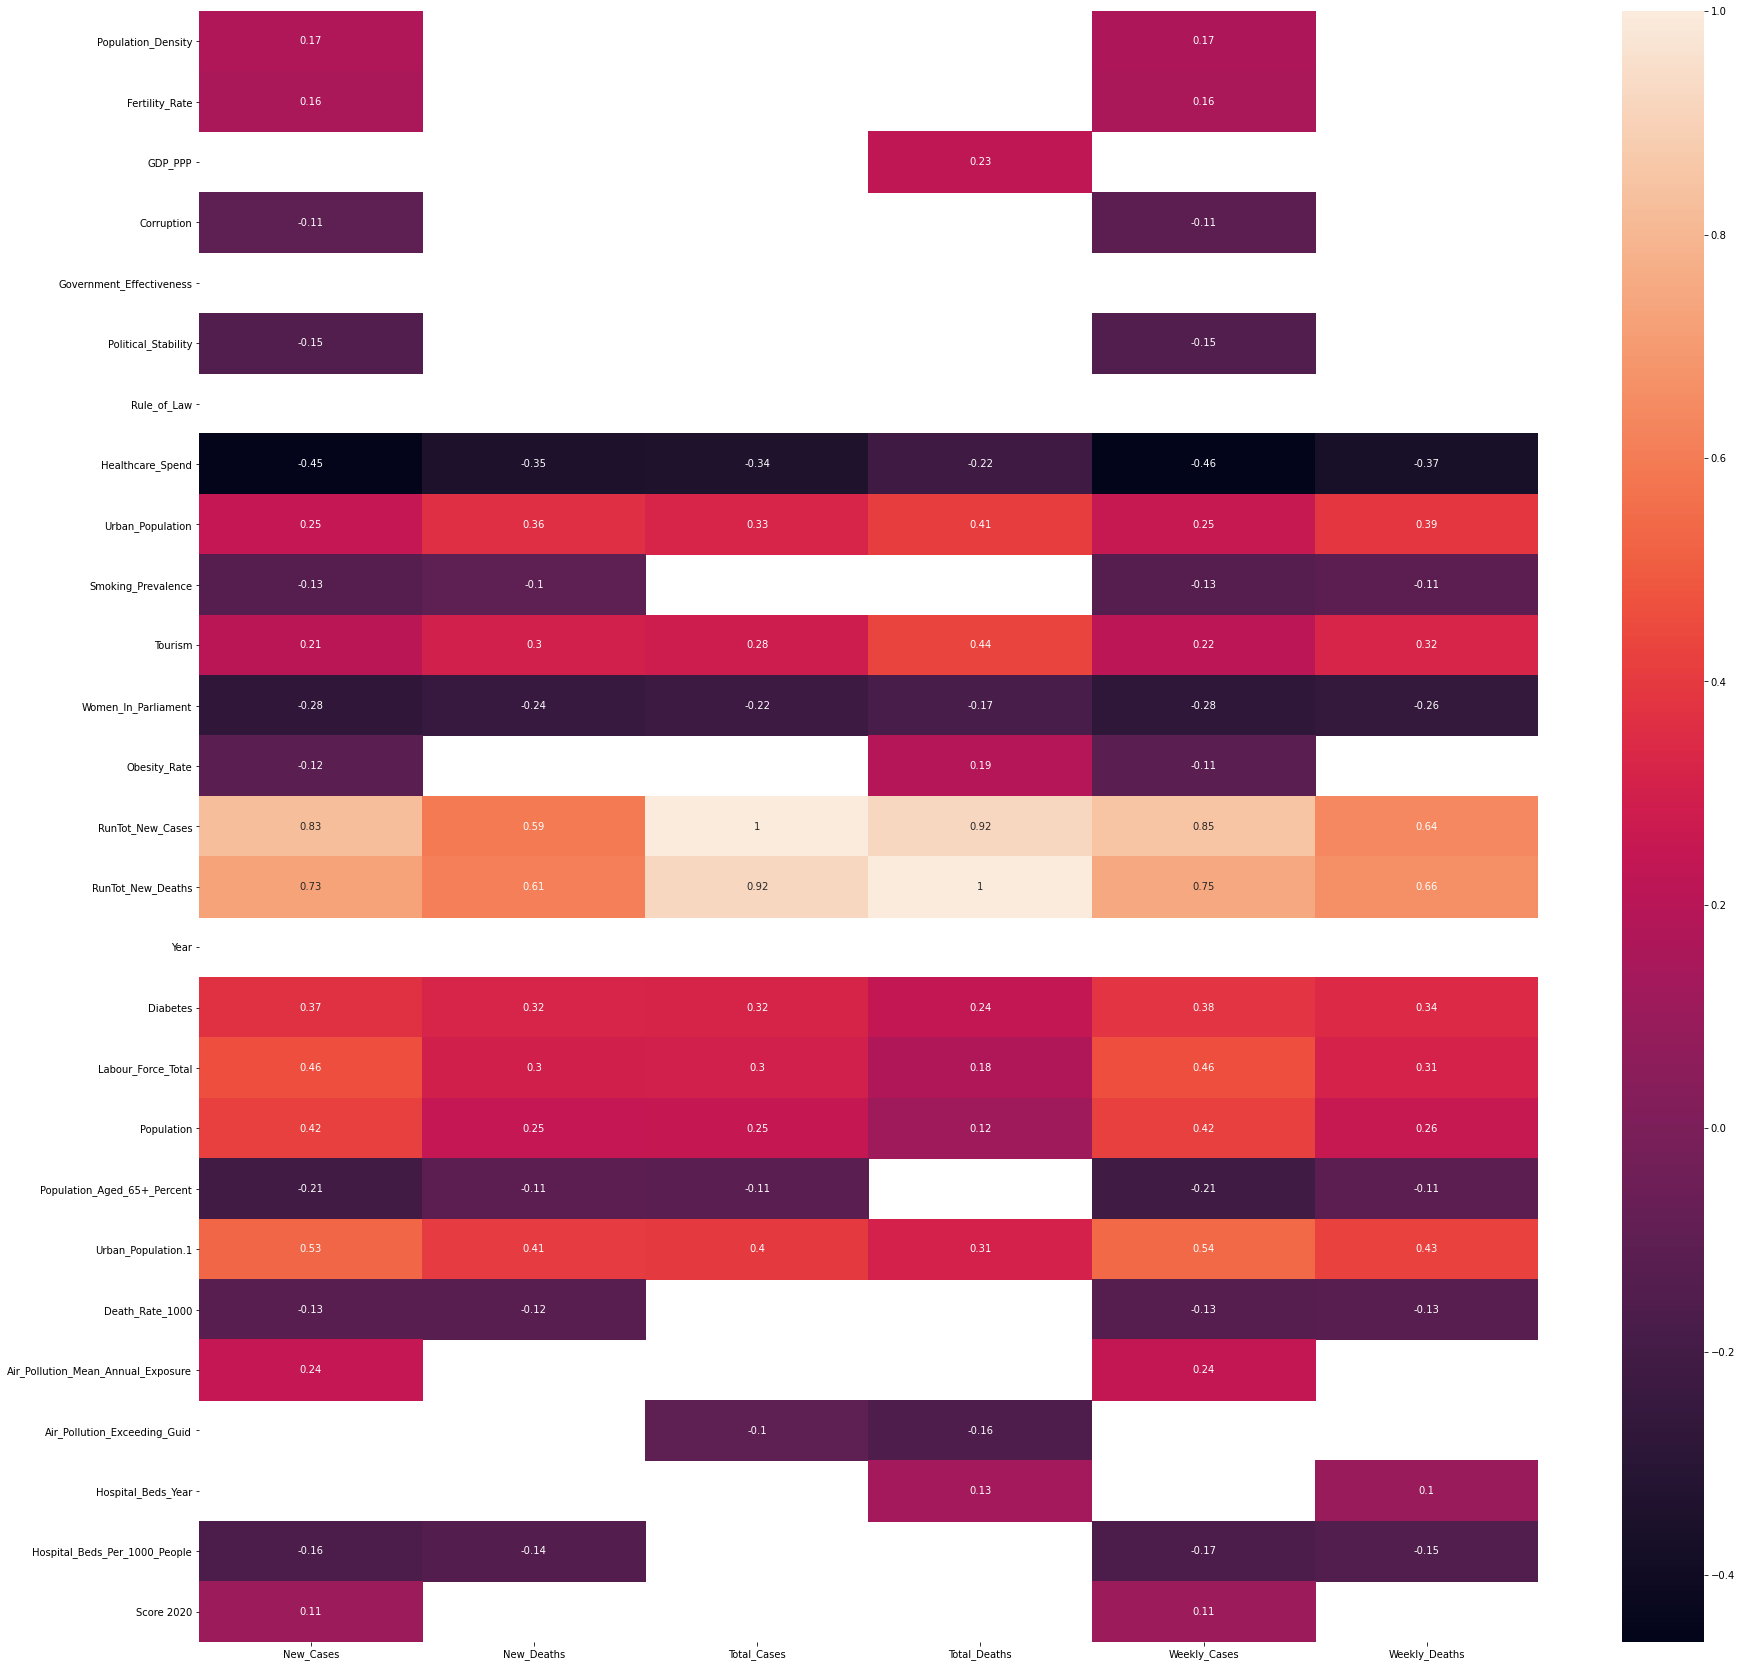

In [39]:
sub_corr=correlation[abs(correlation)>0.1][['New_Cases','New_Deaths','Total_Cases','Total_Deaths','Weekly_Cases','Weekly_Deaths']][6:]
plt.figure(figsize=(30,30)) 
sns.heatmap(sub_corr, annot=True)

Correlation of cases with :
* around 0.1 : fertility, gdp, gov effectivness, rule of law, urban pop, obesity rate, air polution that exceeds guidance
* around 0.3-0.4 : tourism (specially deaths),labour force total, population, urban pop(specially cases), 

Brazil


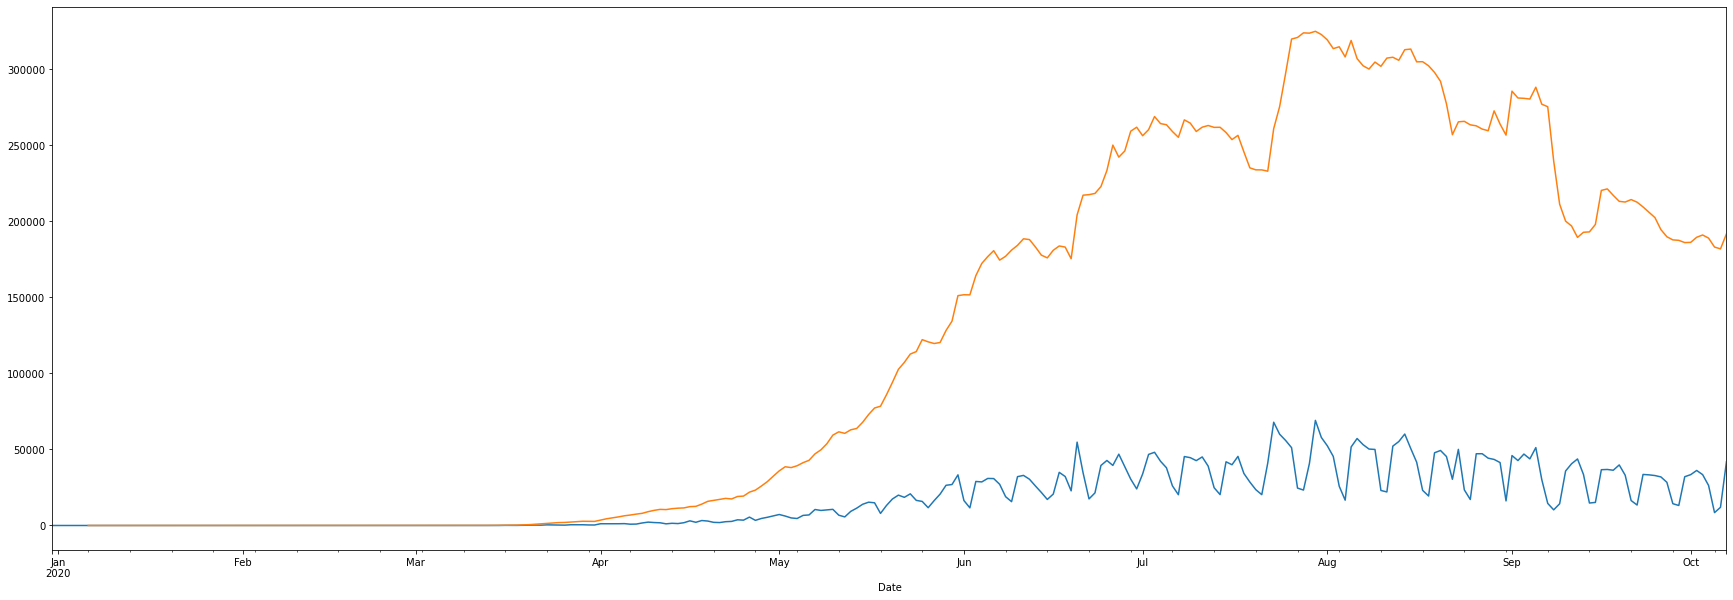

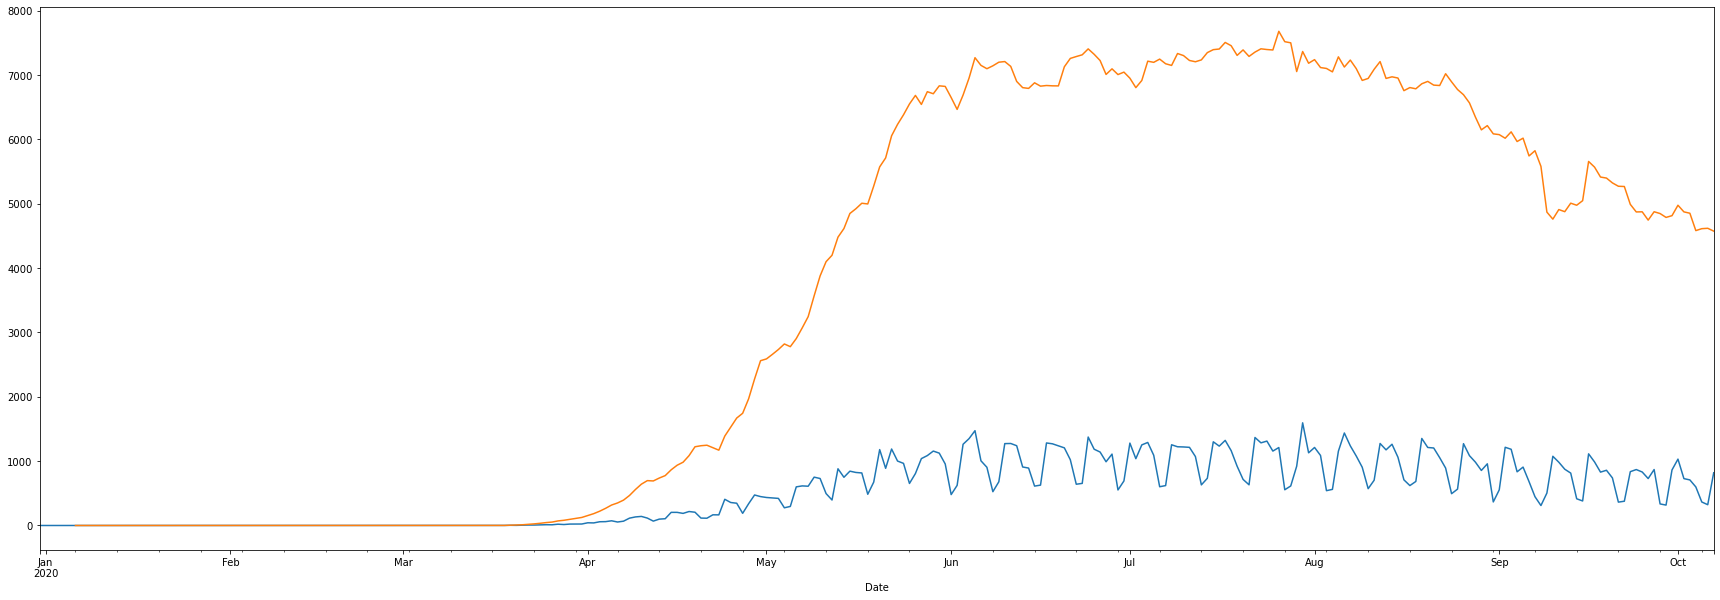

India


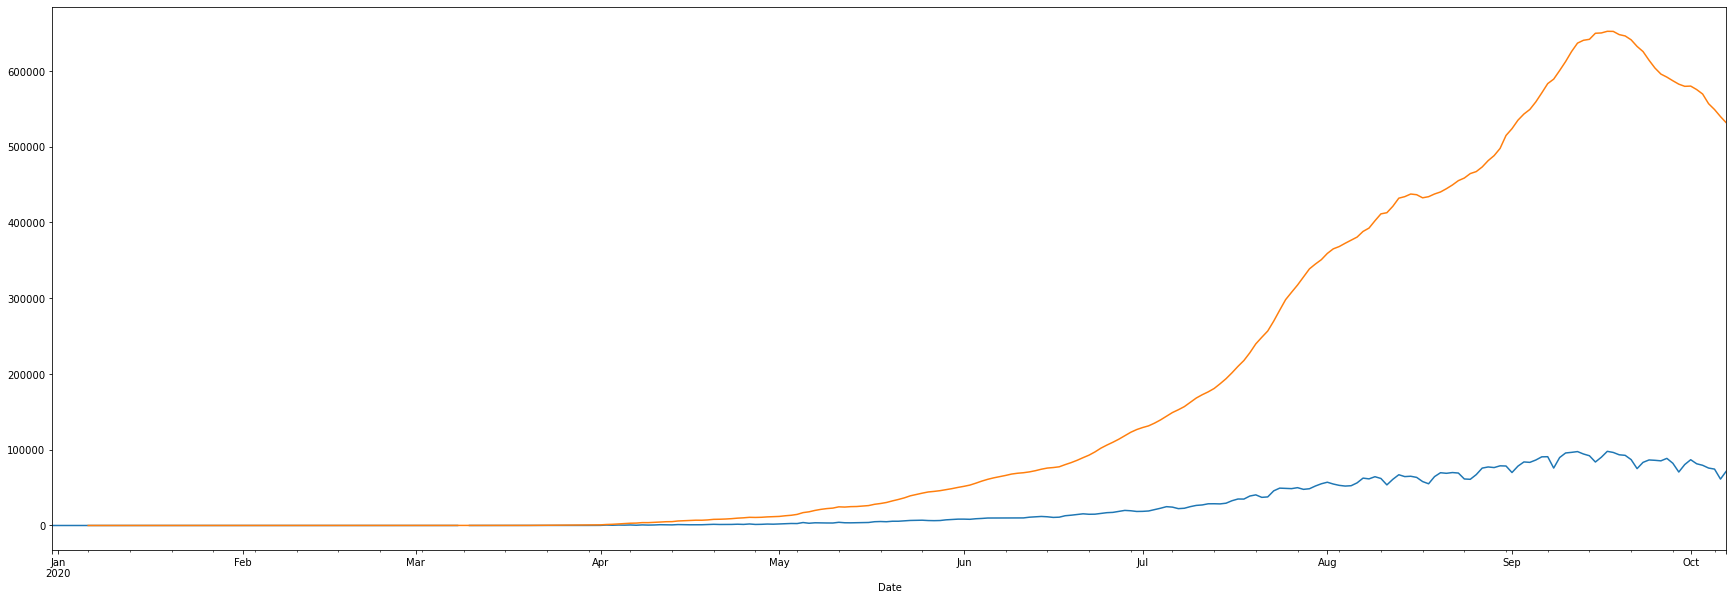

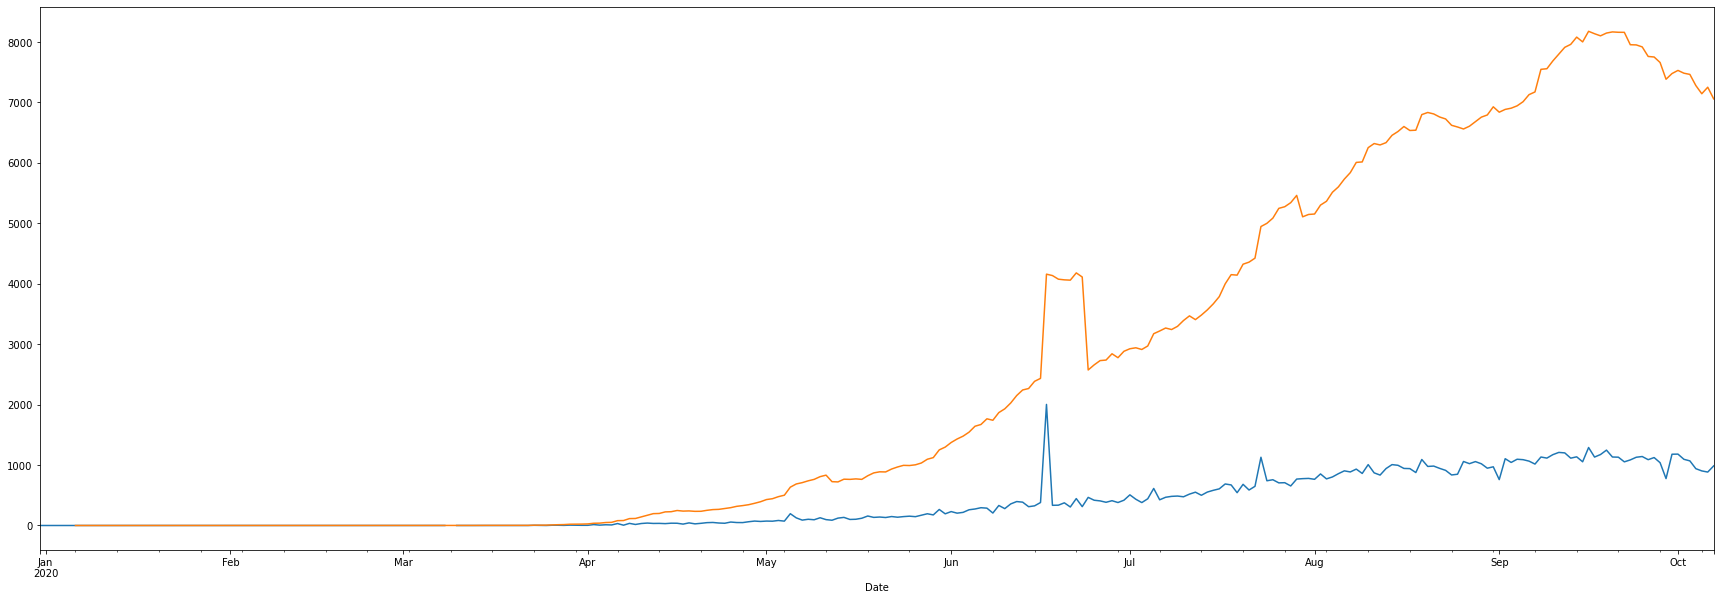

Iran


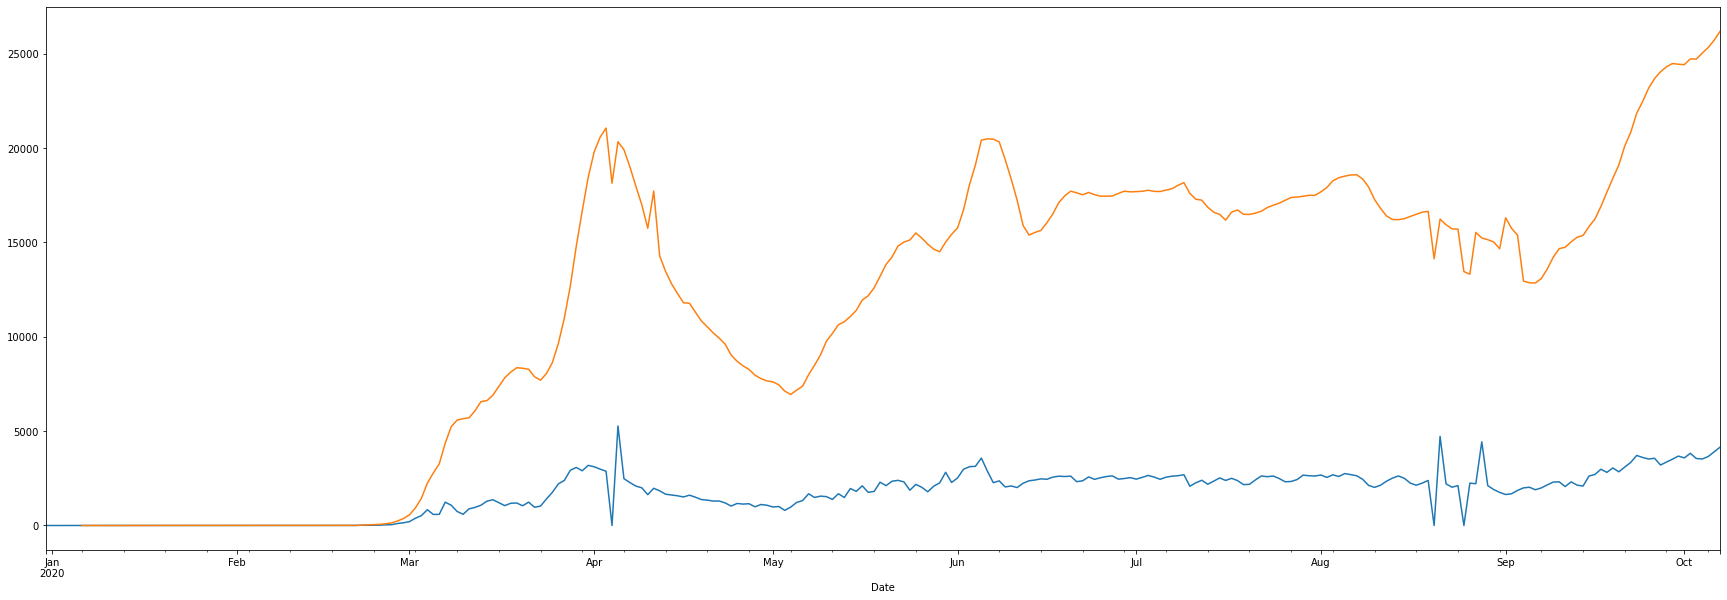

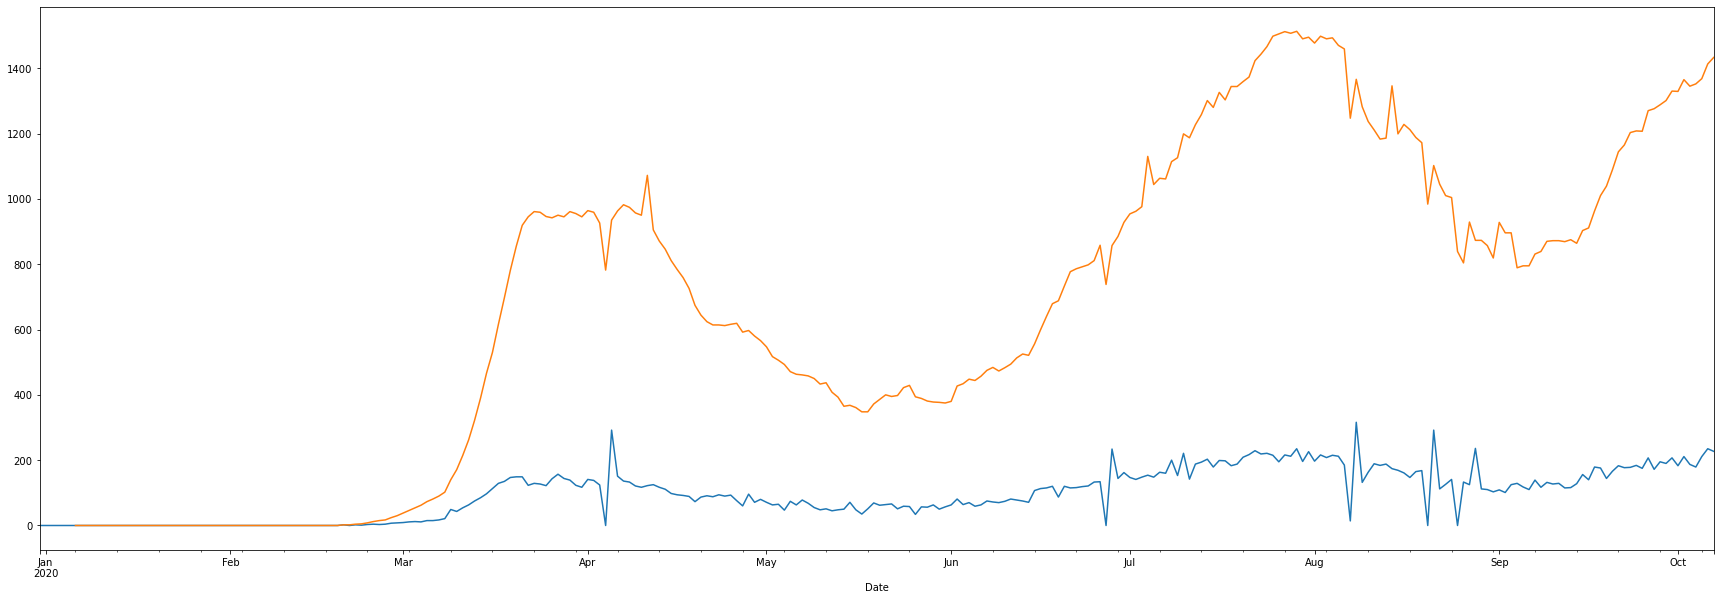

Italy


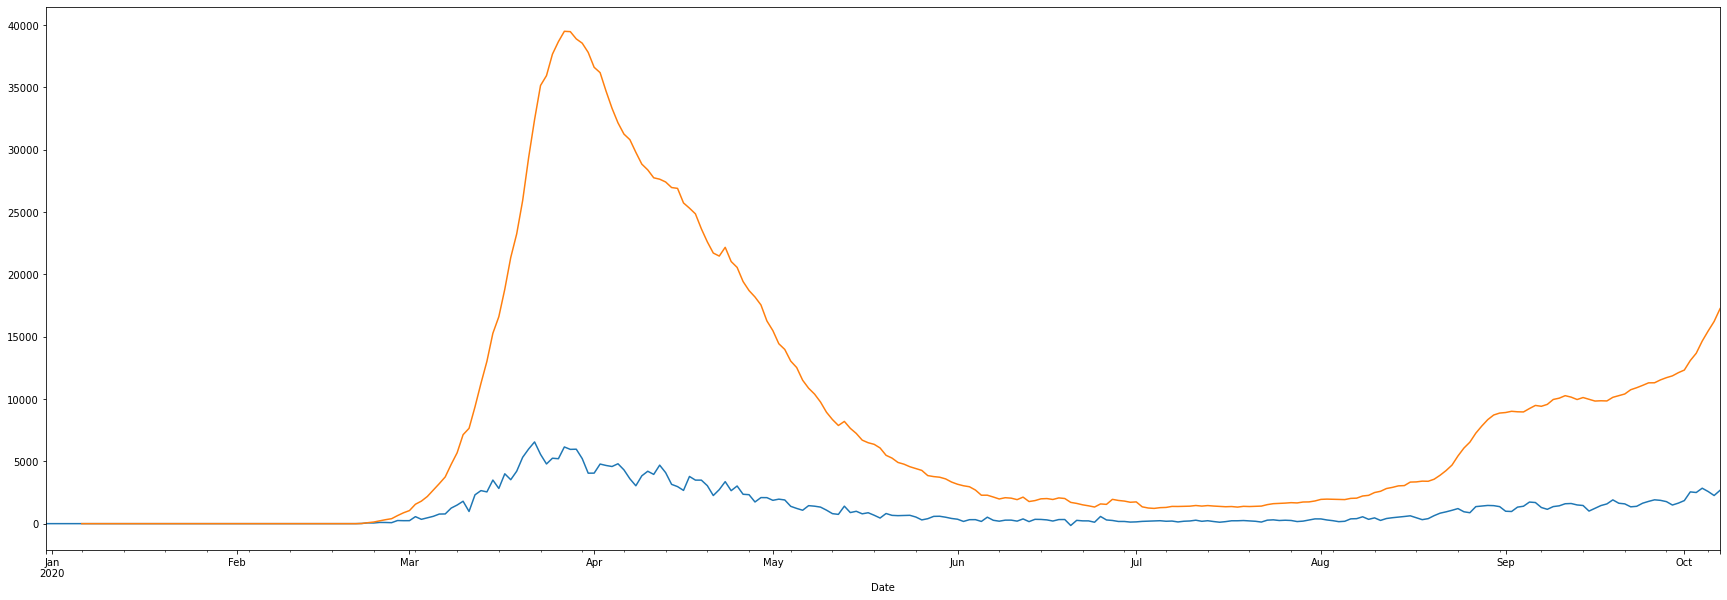

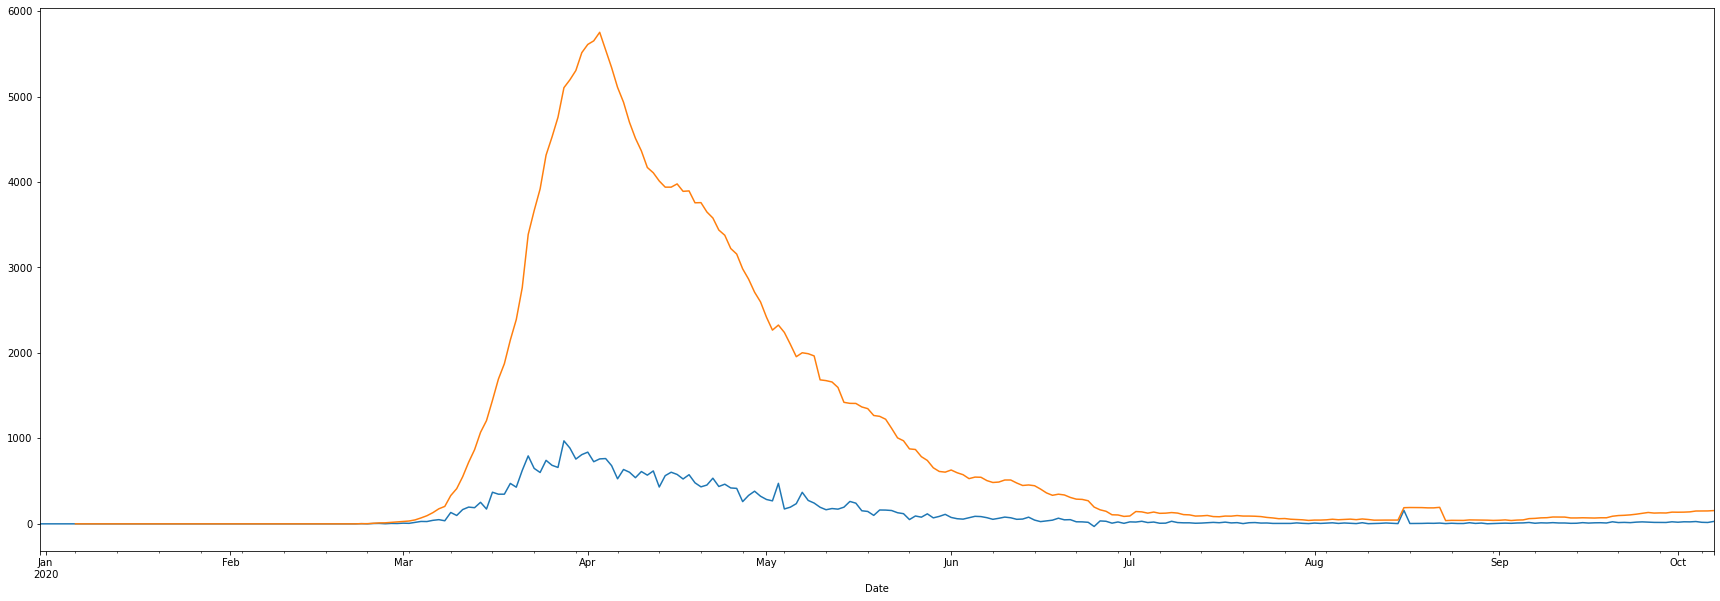

New Zealand


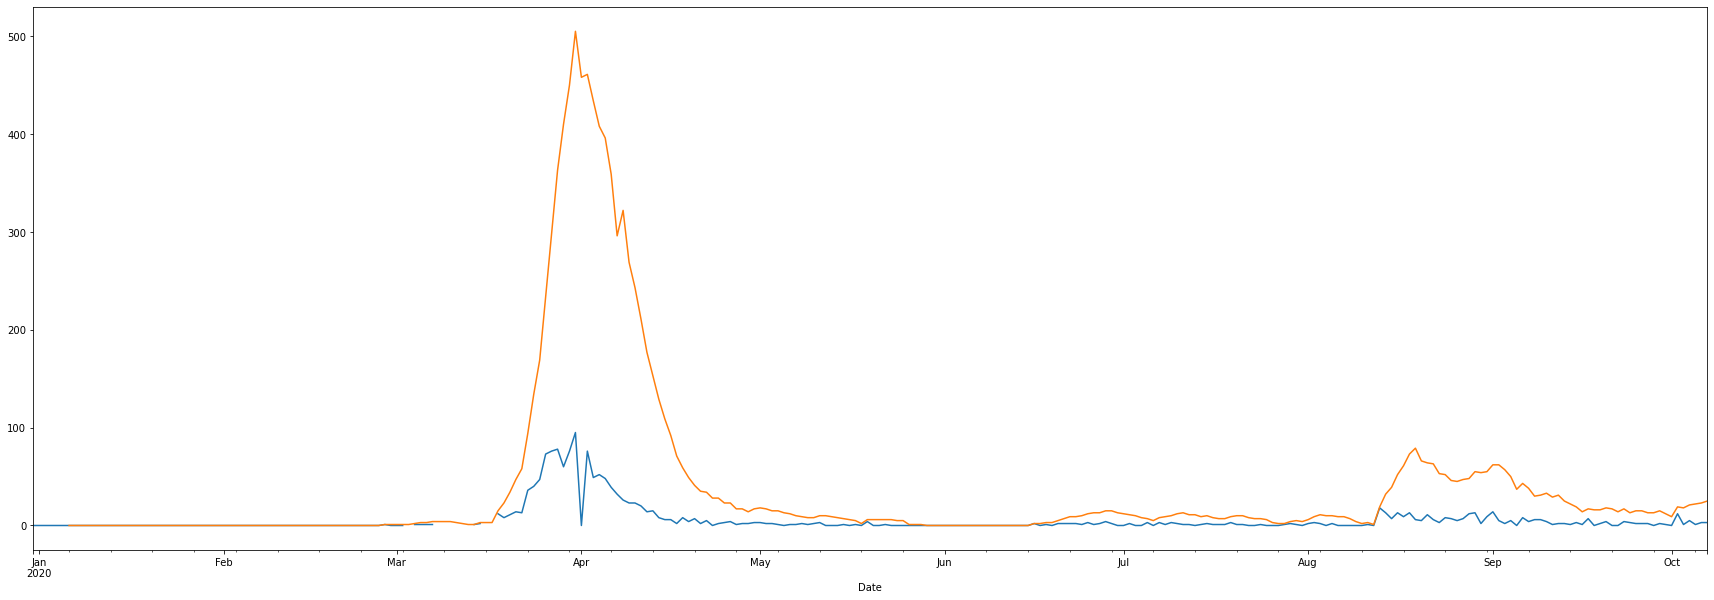

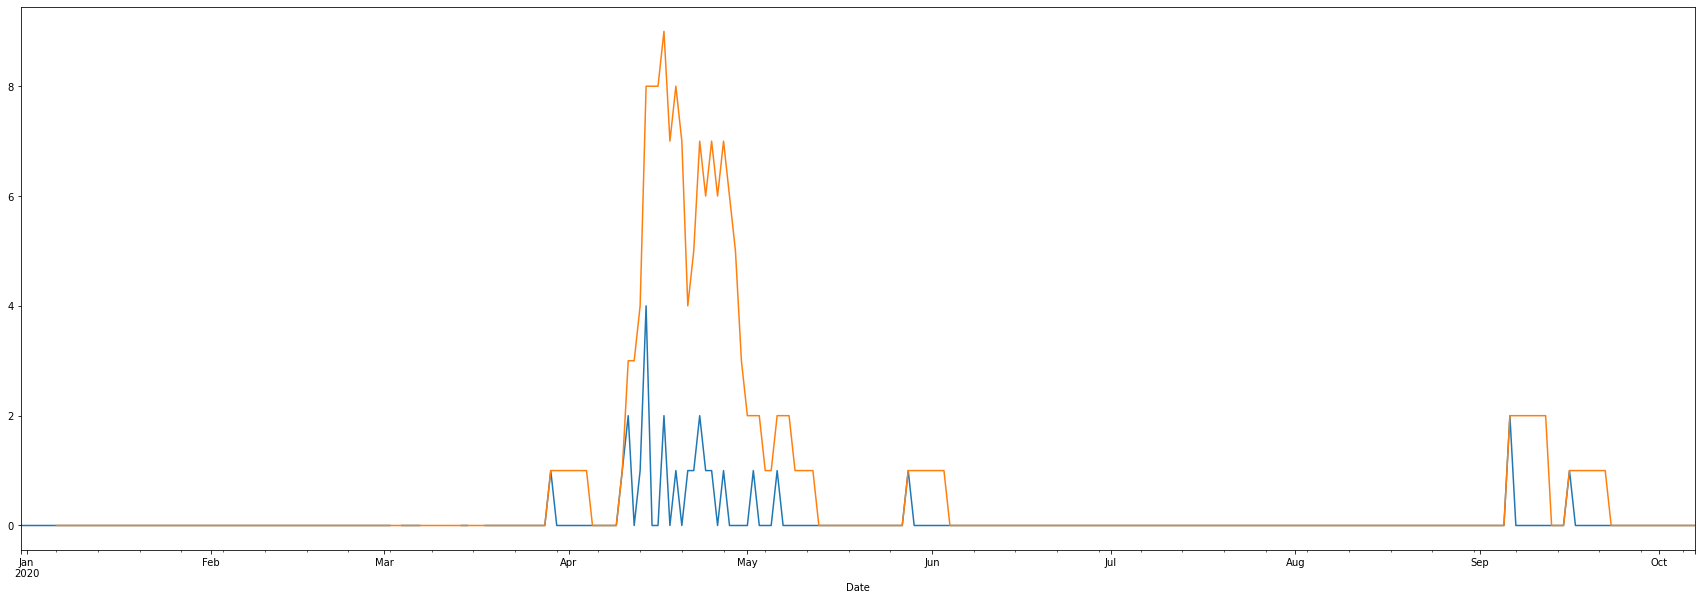

Russia


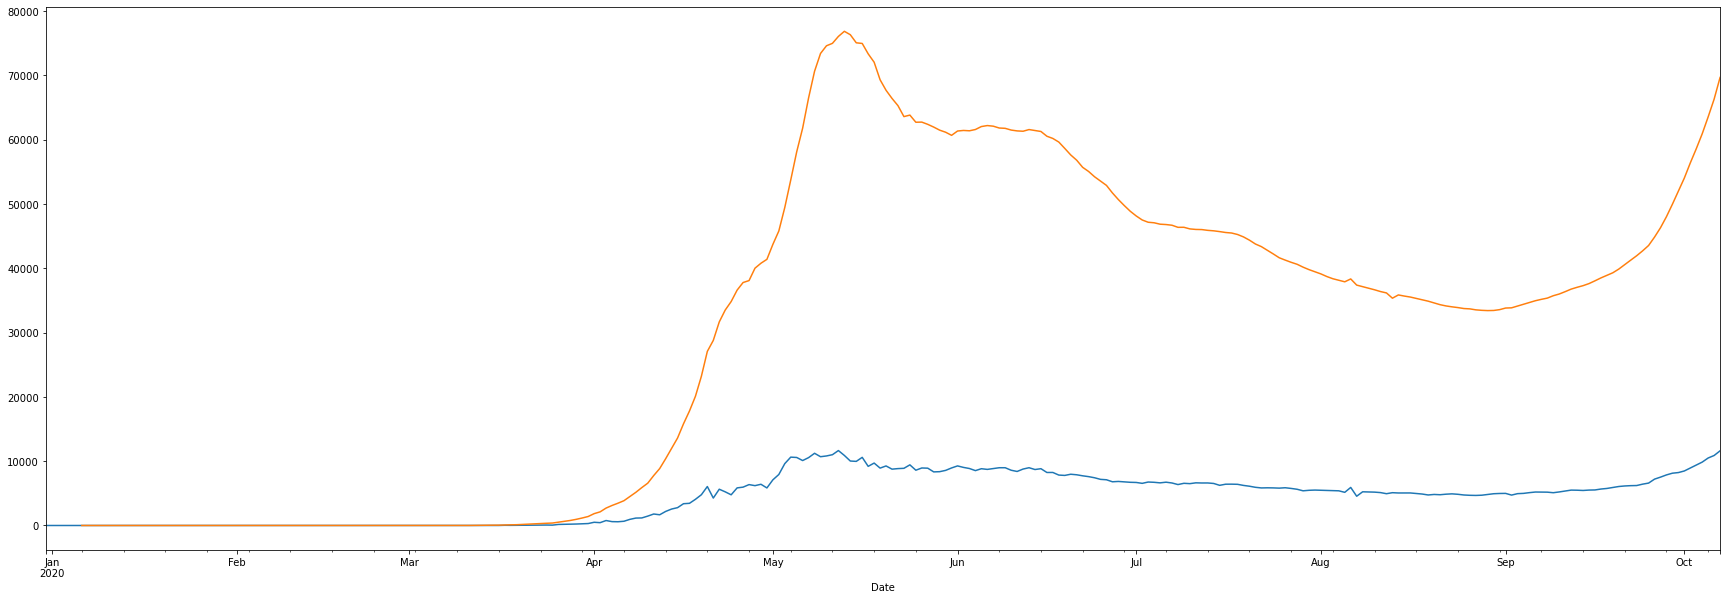

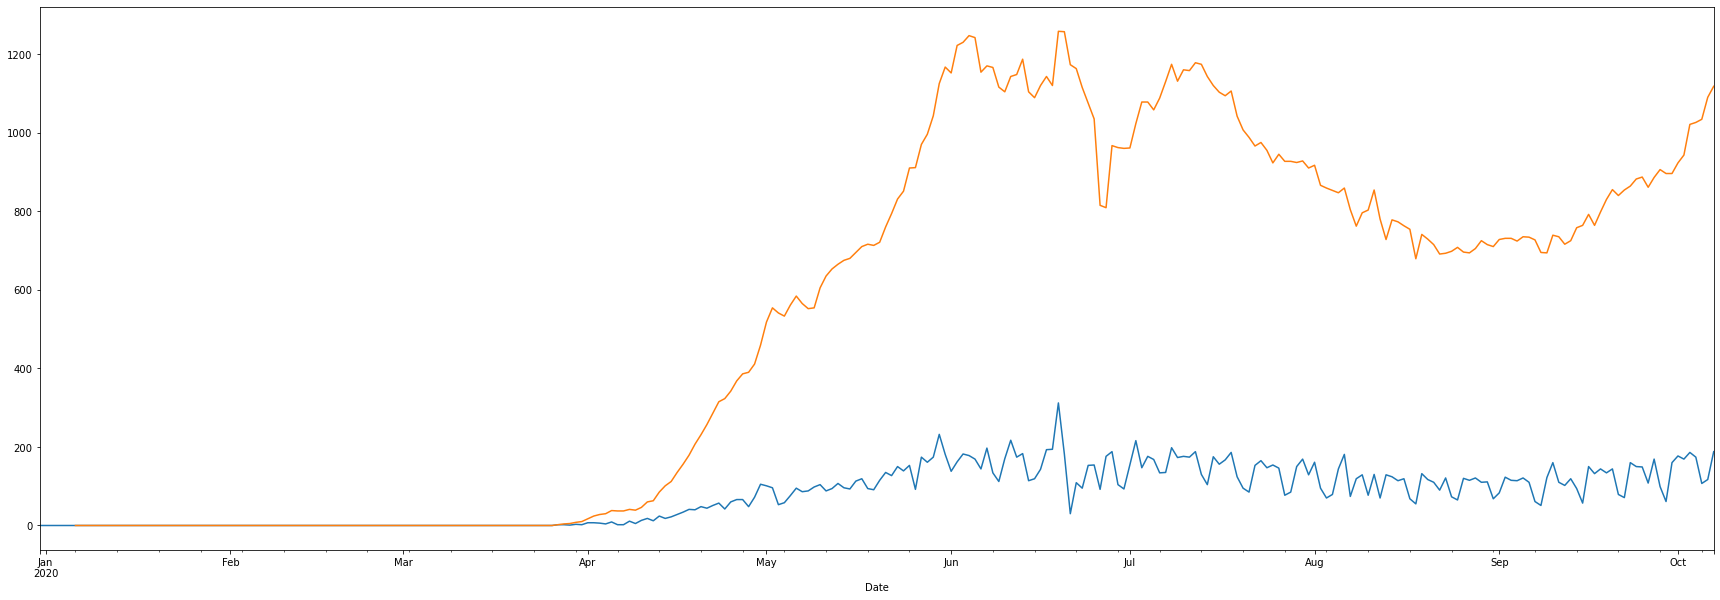

South Africa


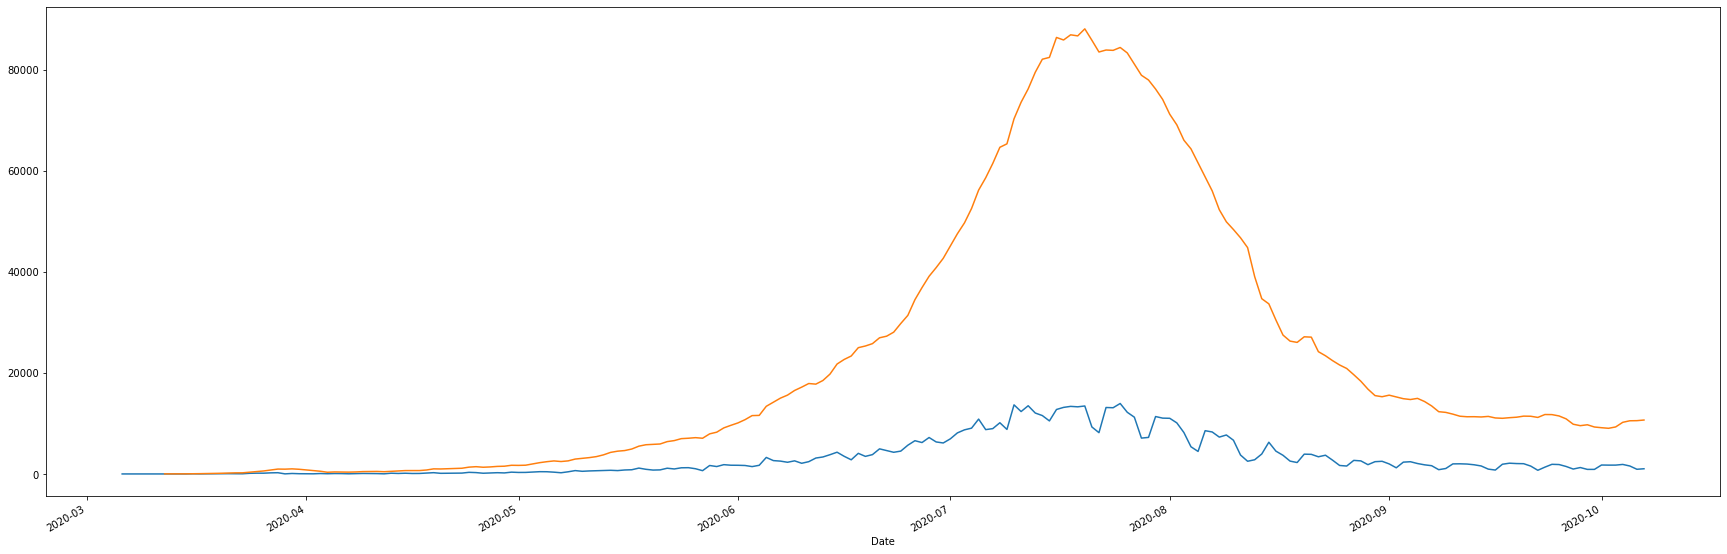

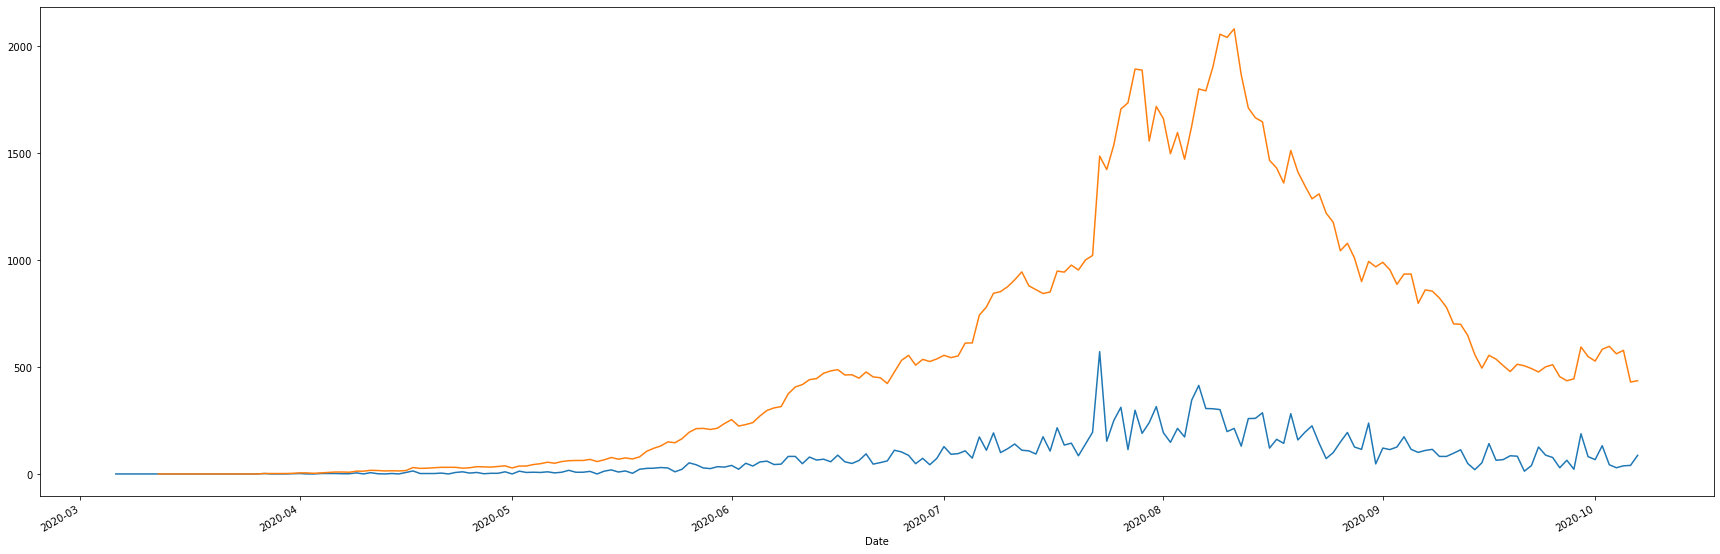

Sweden


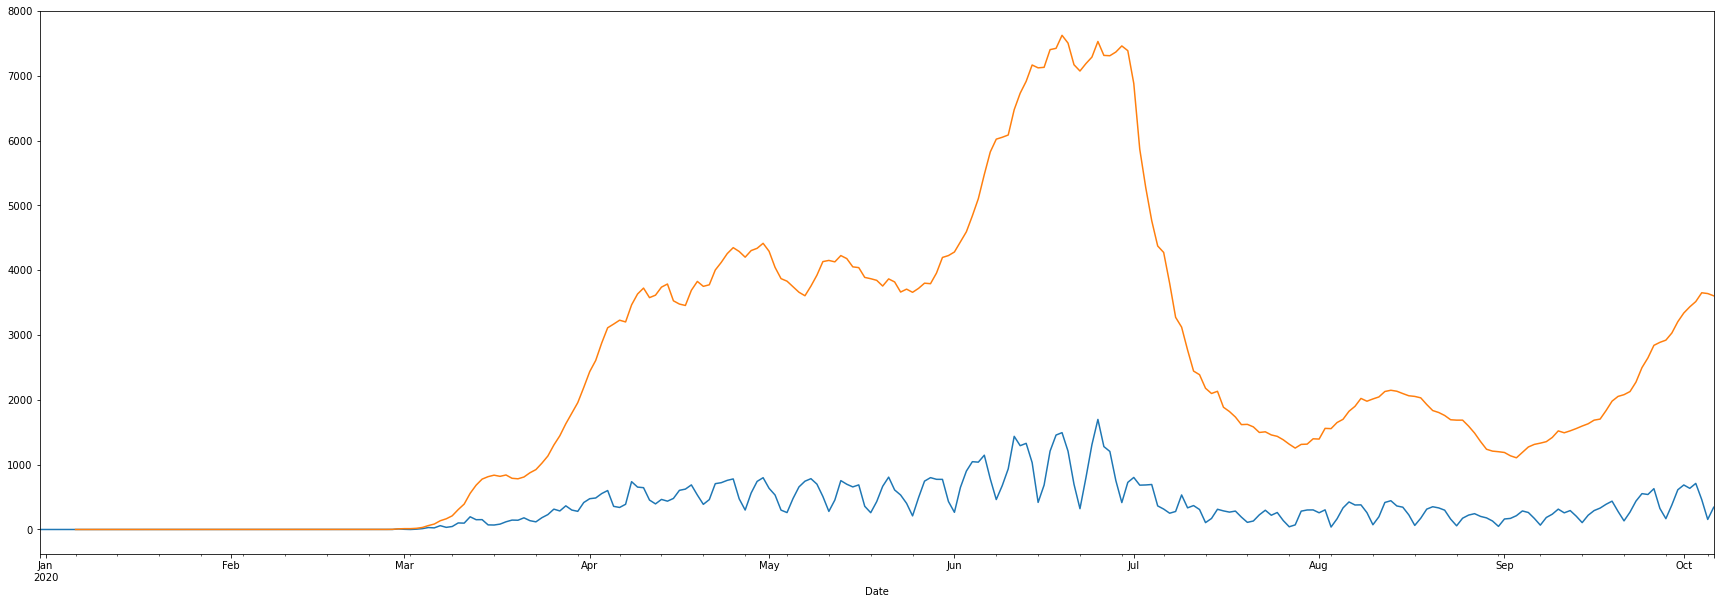

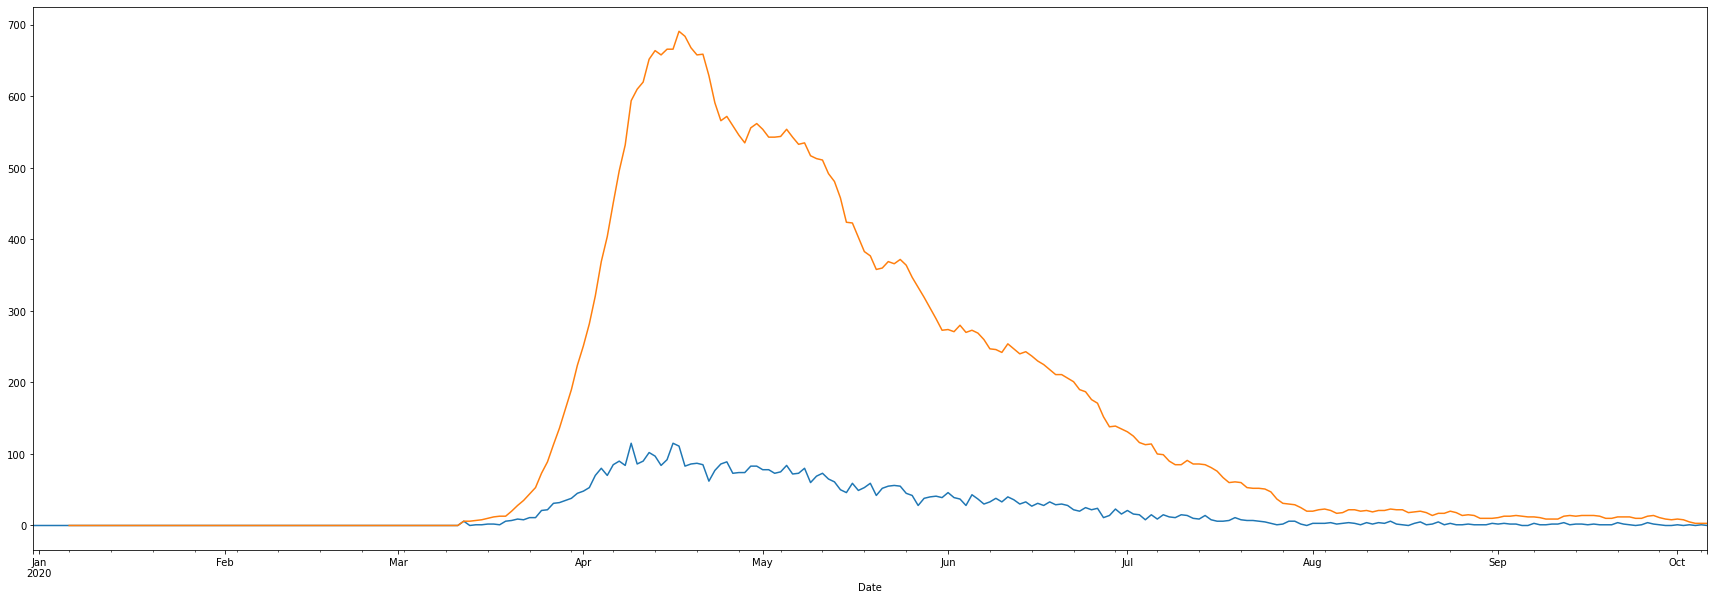

United Kingdom


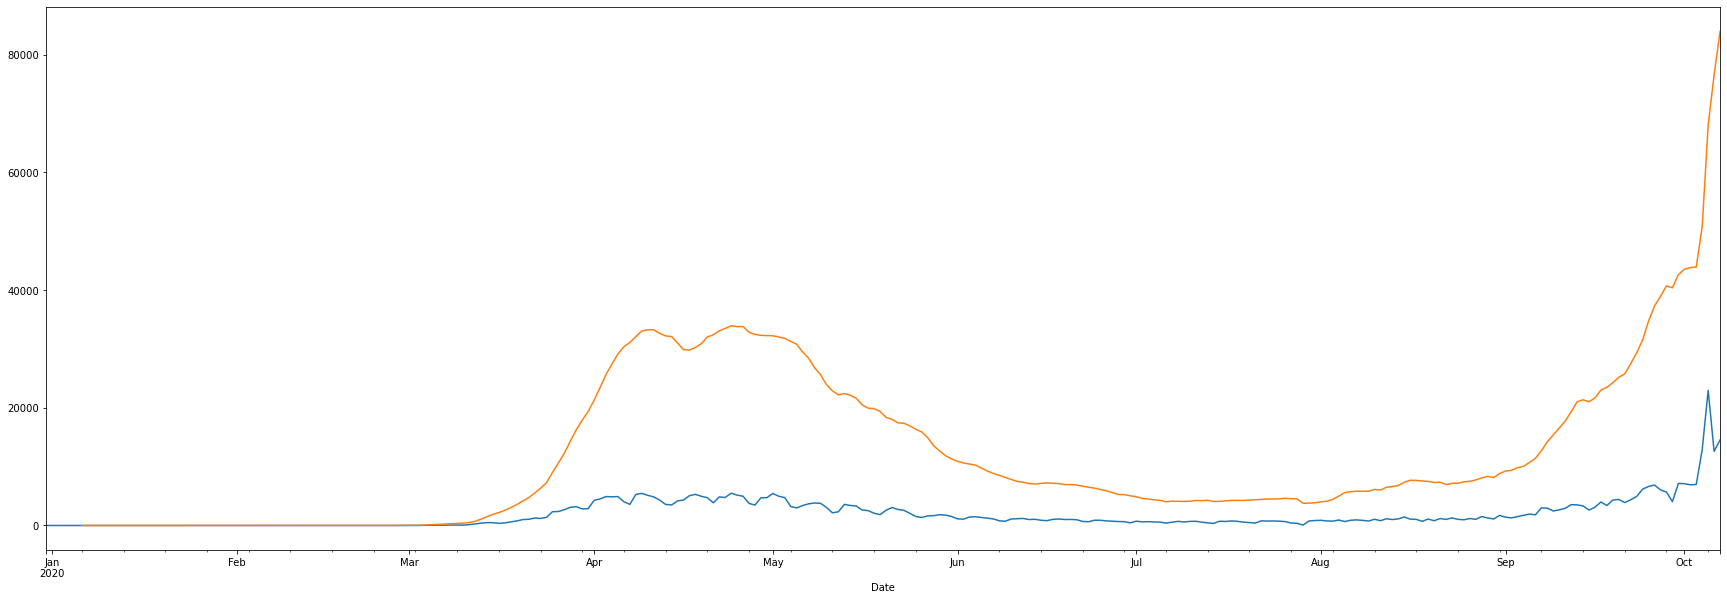

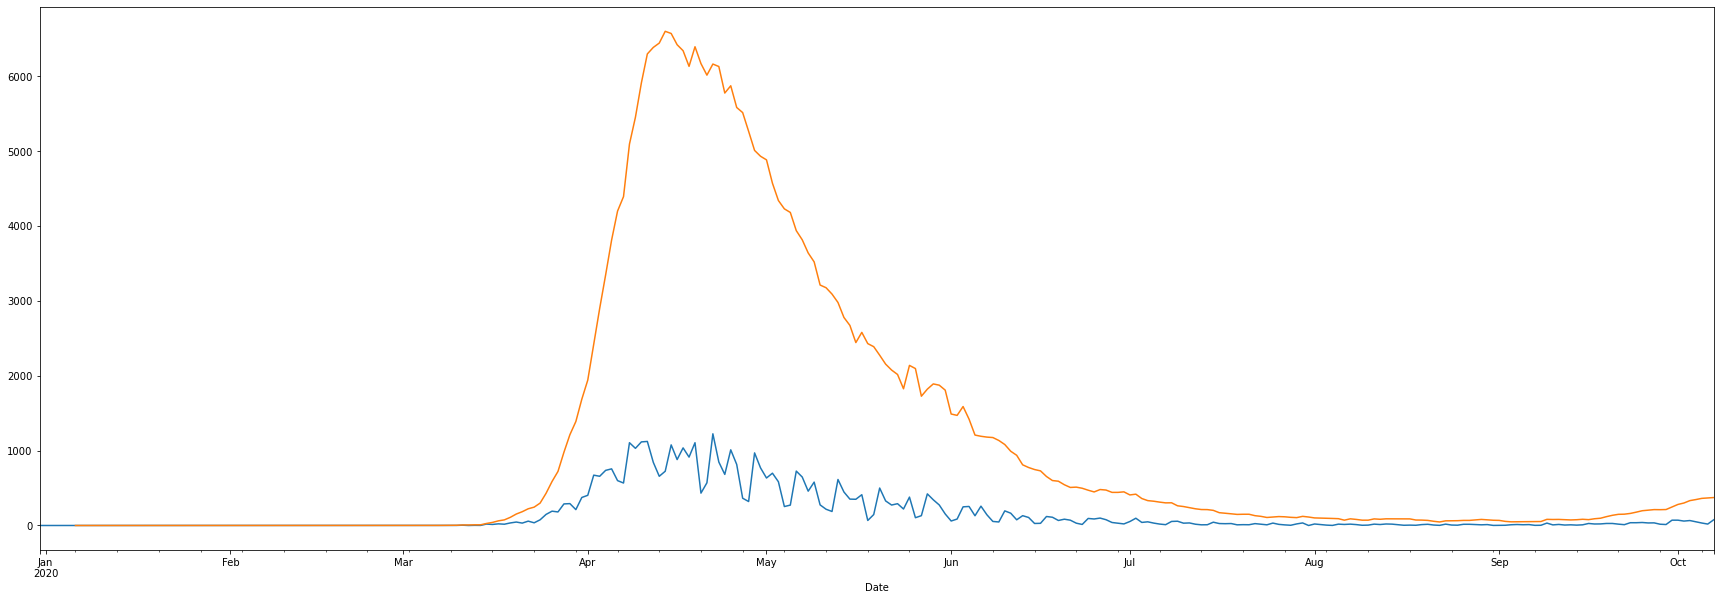

United States


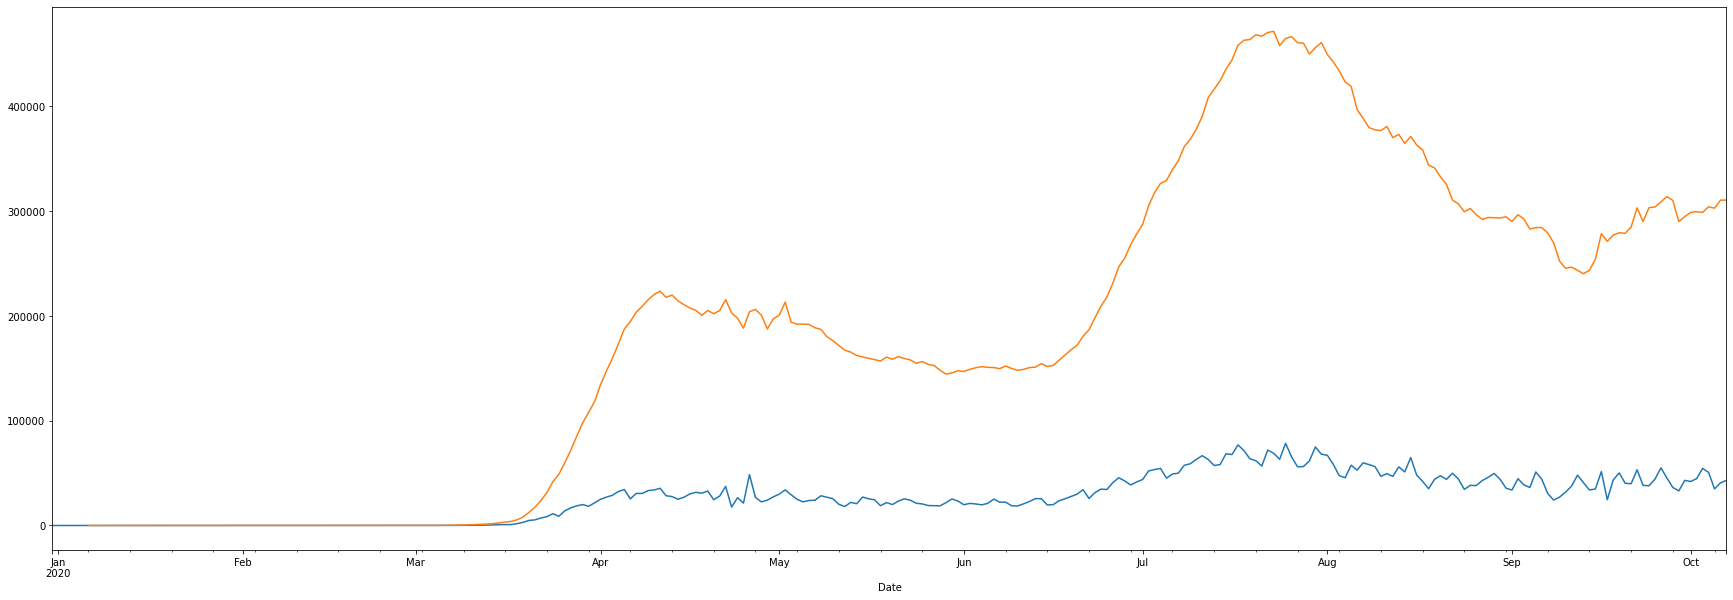

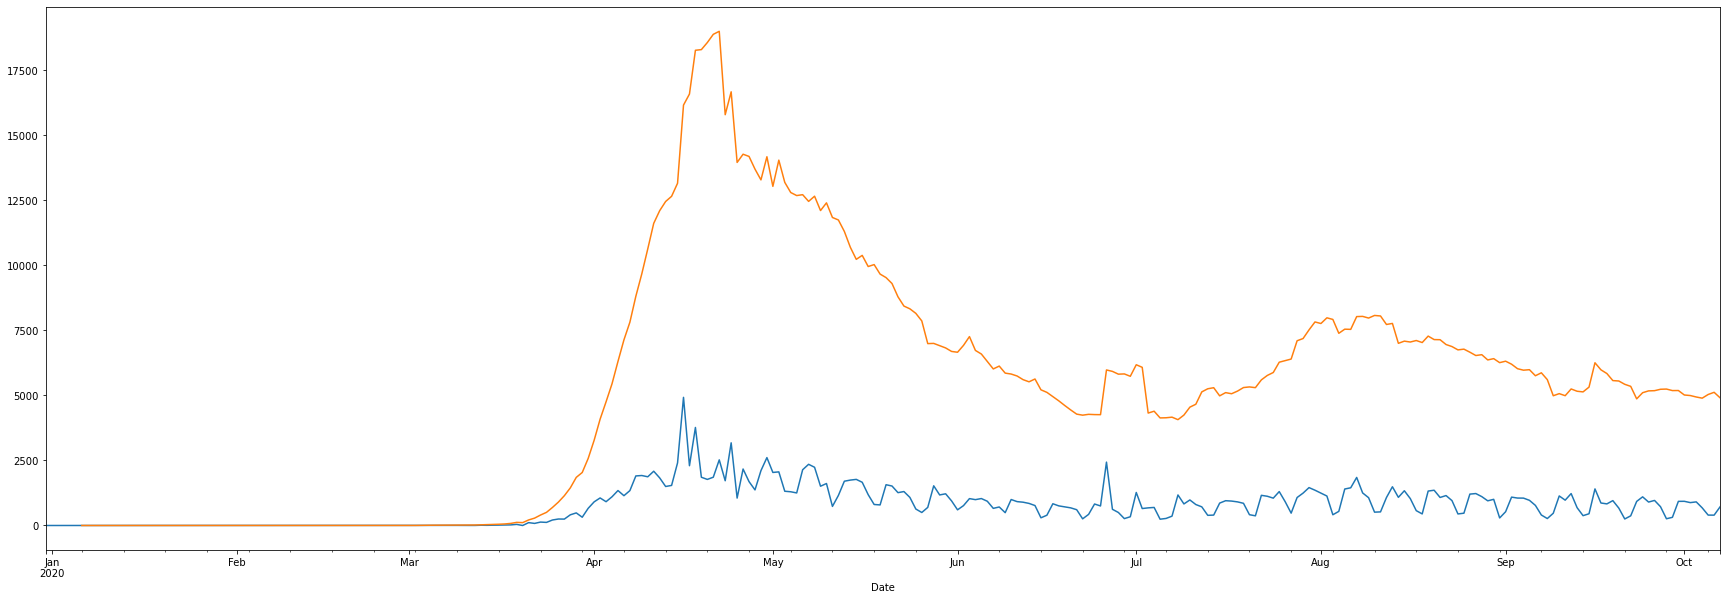

In [40]:
for country in countries.index:
    covid19_country=covid19[covid19['Countries']==country].set_index('Date')
    print(country)
    plt.figure(figsize=(30,10)) 
    covid19_country['New_Cases'].plot()
    covid19_country['Weekly_Cases'].plot()
    plt.show()
    plt.figure(figsize=(30,10))
    covid19_country['New_Deaths'].plot()
    covid19_country['Weekly_Deaths'].plot()
    plt.show()
    

In [72]:
for country in countries.index:
    print(country)
    print(covid19[covid19['Countries']==country]['Score 2020'])

Brazil
5424    34.05
5425    34.05
5426    34.05
5427    34.05
5428    34.05
        ...  
5701    34.05
5702    34.05
5703    34.05
5704    34.05
5705    34.05
Name: Score 2020, Length: 282, dtype: float64
India
17385    45.33
17386    45.33
17387    45.33
17388    45.33
17389    45.33
         ...  
17662    45.33
17663    45.33
17664    45.33
17665    45.33
17666    45.33
Name: Score 2020, Length: 282, dtype: float64
Iran
17949    64.81
17950    64.81
17951    64.81
17952    64.81
17953    64.81
         ...  
18226    64.81
18227    64.81
18228    64.81
18229    64.81
18230    64.81
Name: Score 2020, Length: 282, dtype: float64
Italy
19077    23.69
19078    23.69
19079    23.69
19080    23.69
19081    23.69
         ...  
19354    23.69
19355    23.69
19356    23.69
19357    23.69
19358    23.69
Name: Score 2020, Length: 282, dtype: float64
New Zealand
27259    10.69
27260    10.69
27261    10.69
27262    10.69
27263    10.69
         ...  
27536    10.69
27537    10.69
27538    10

In [63]:
from sklearn import preprocessing
runTot_new_deaths = np.array(covid19['RunTot_New_Deaths'])
runTot_new_cases = np.array(covid19['RunTot_New_Cases'])
covid19['normalized_cases'] = preprocessing.normalize([runTot_new_cases])[0]
covid19['normalized_deaths'] = preprocessing.normalize([runTot_new_deaths])[0]

Brazil


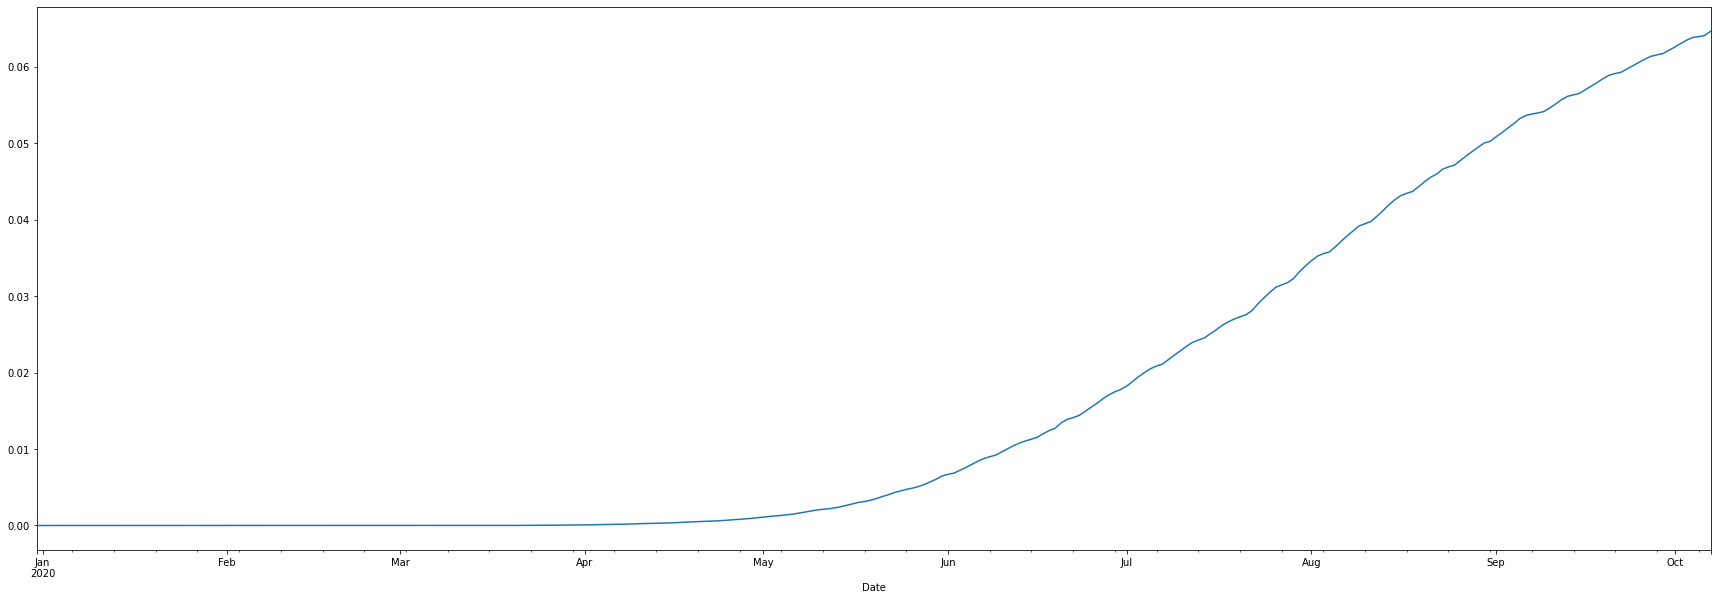

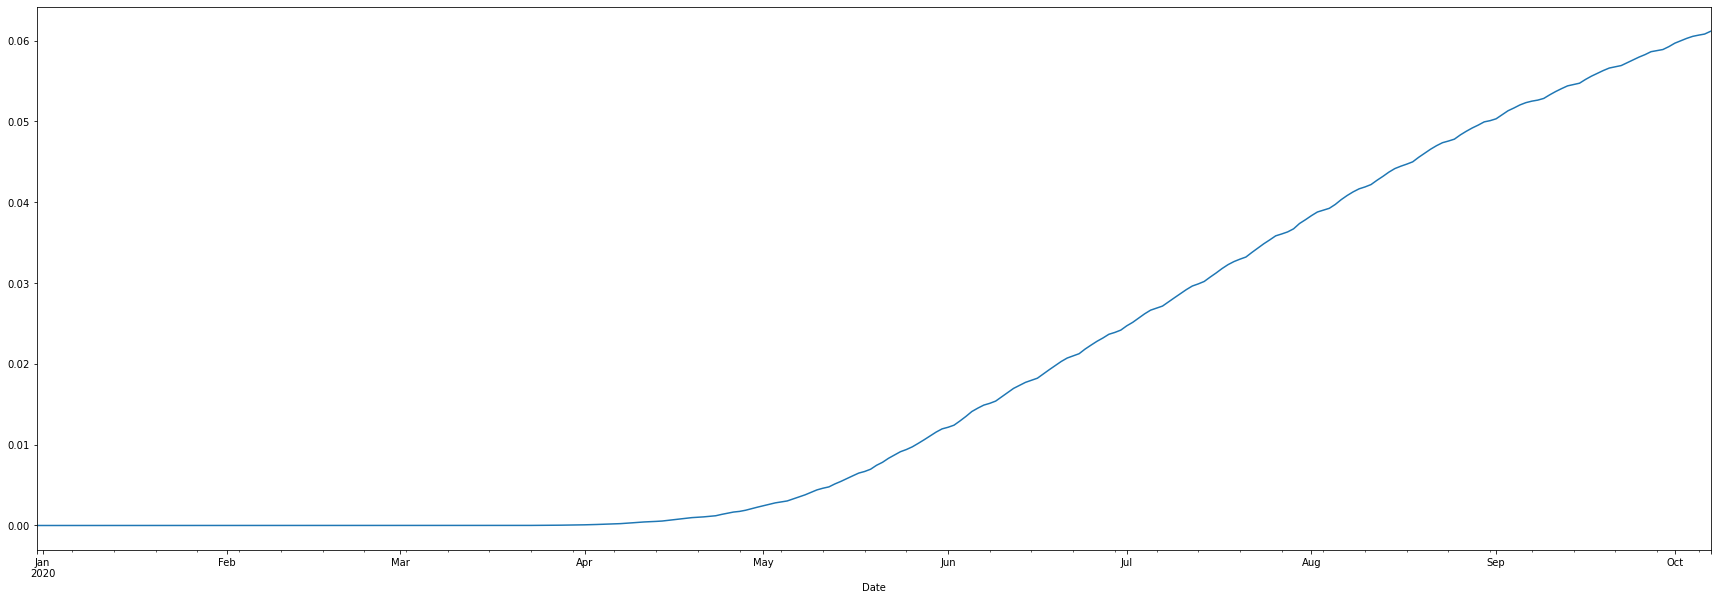

India


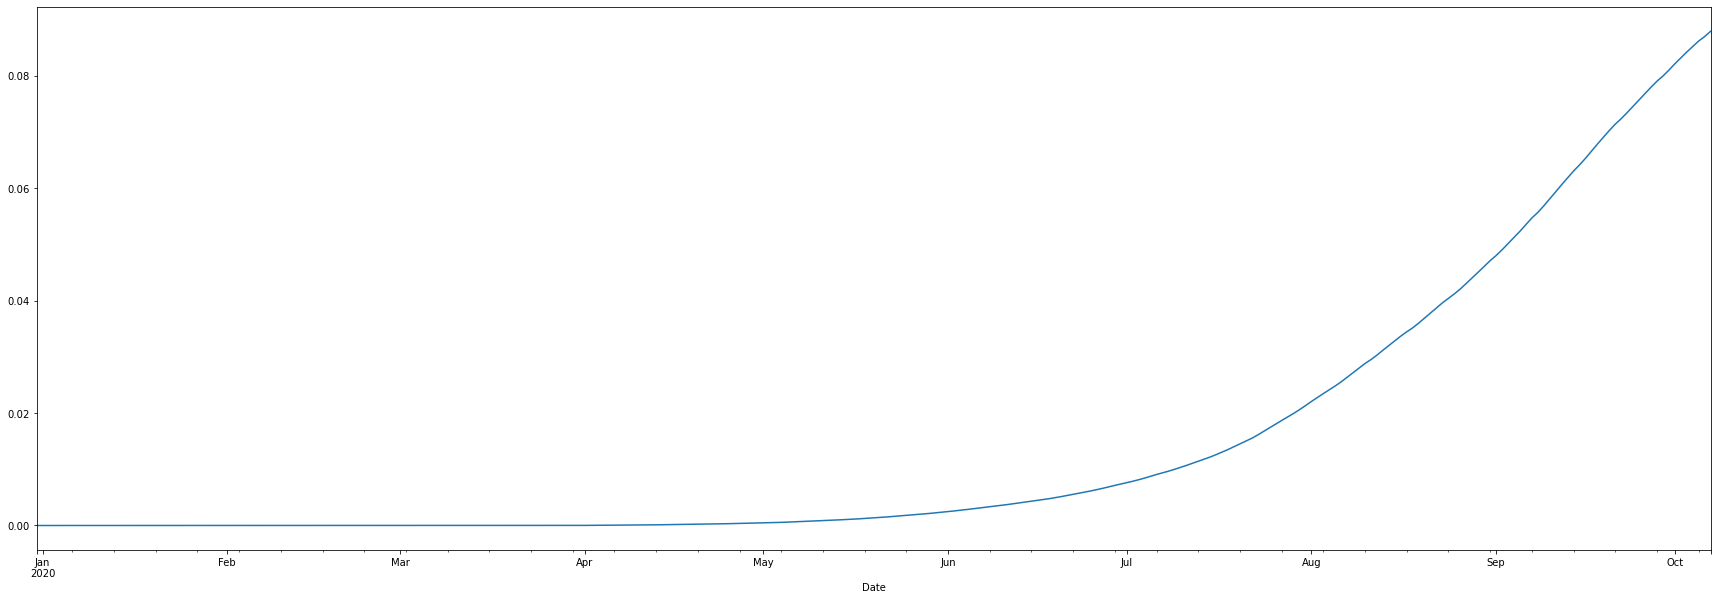

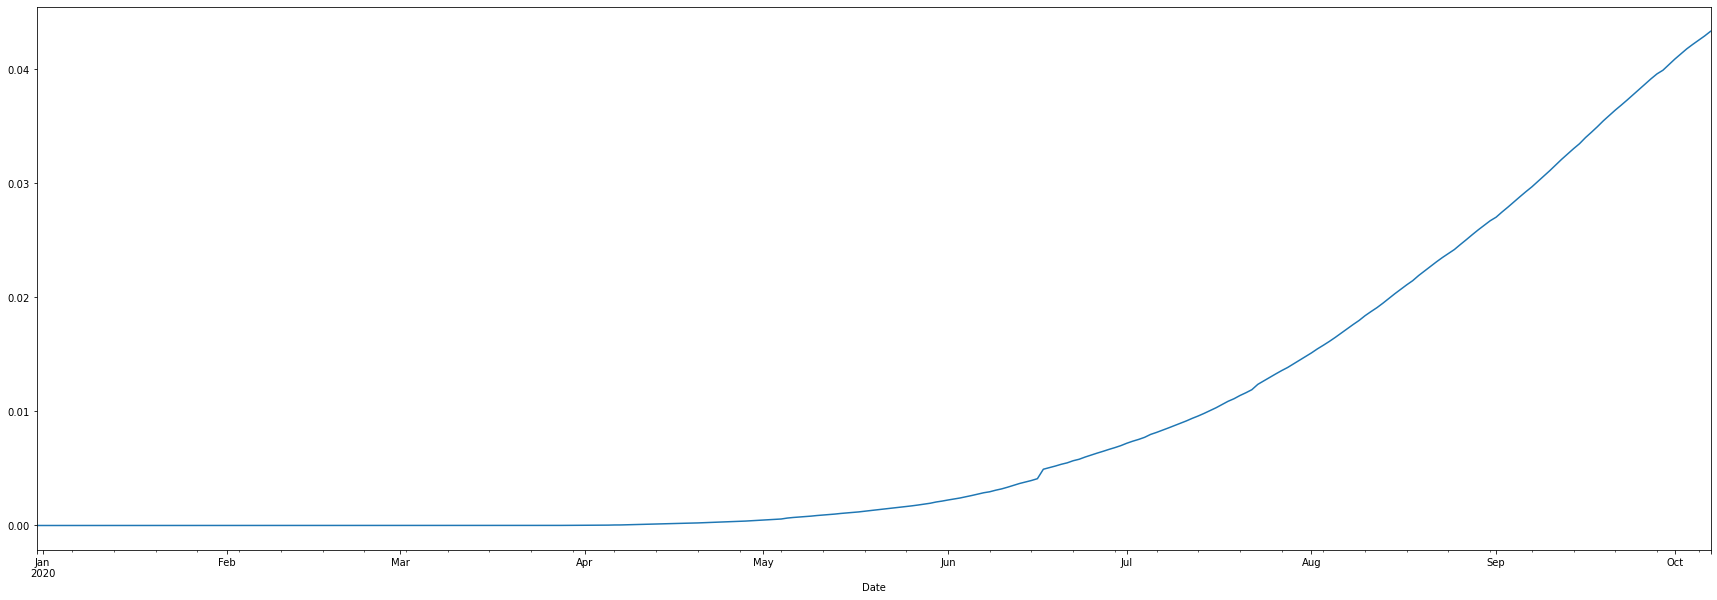

Iran


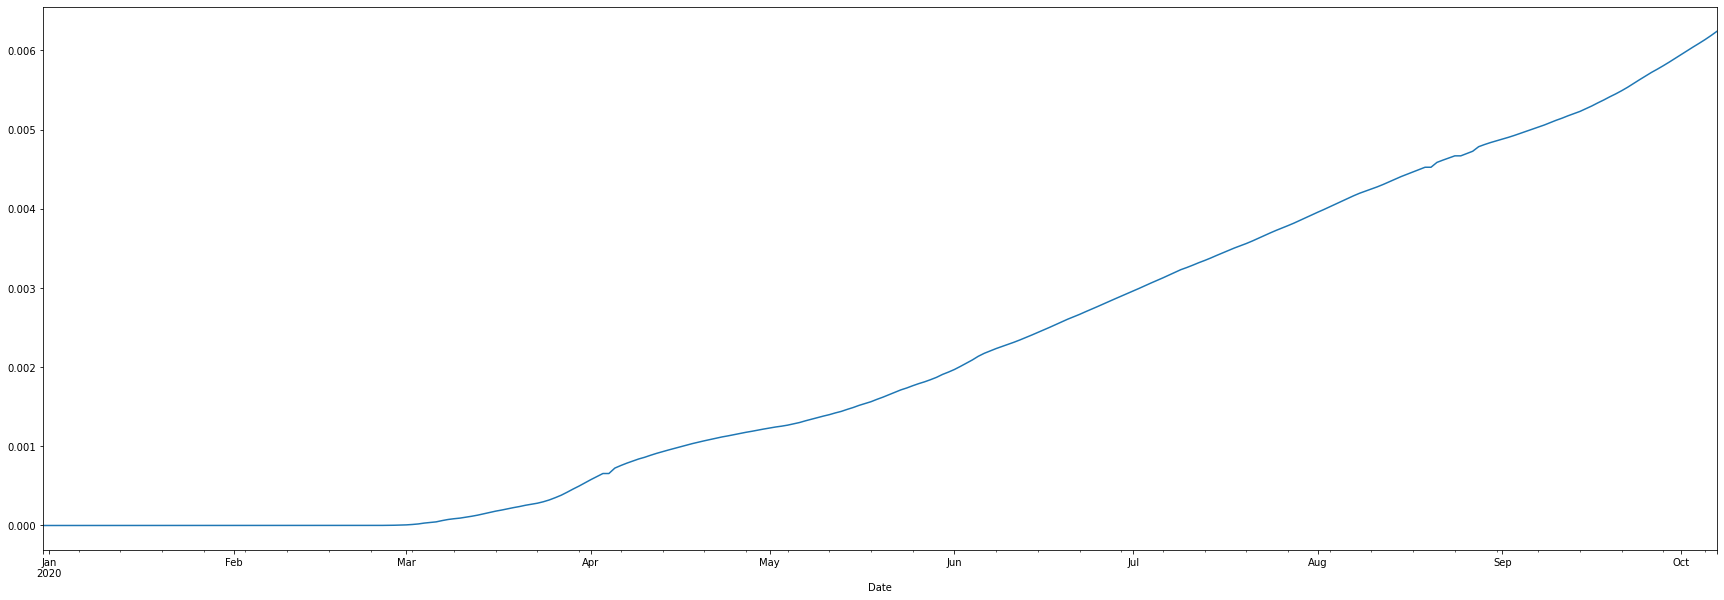

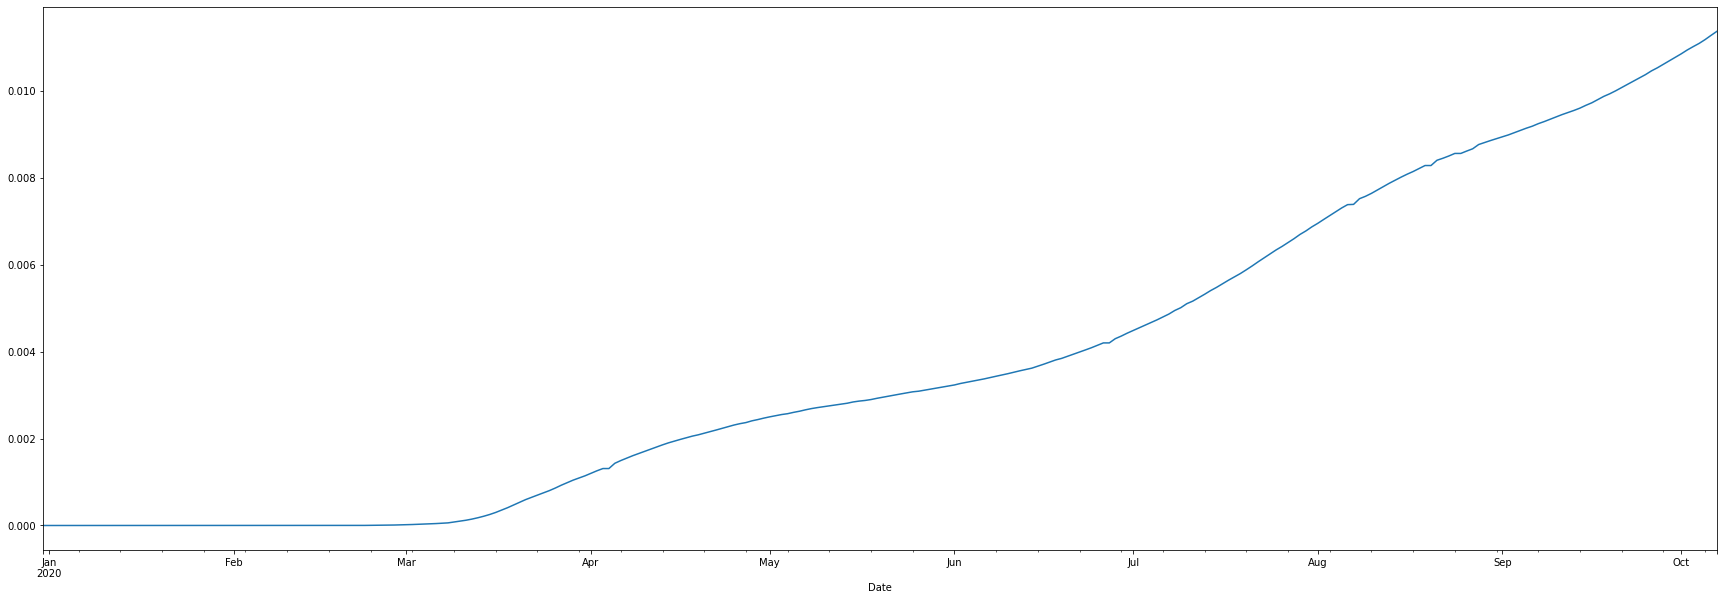

Italy


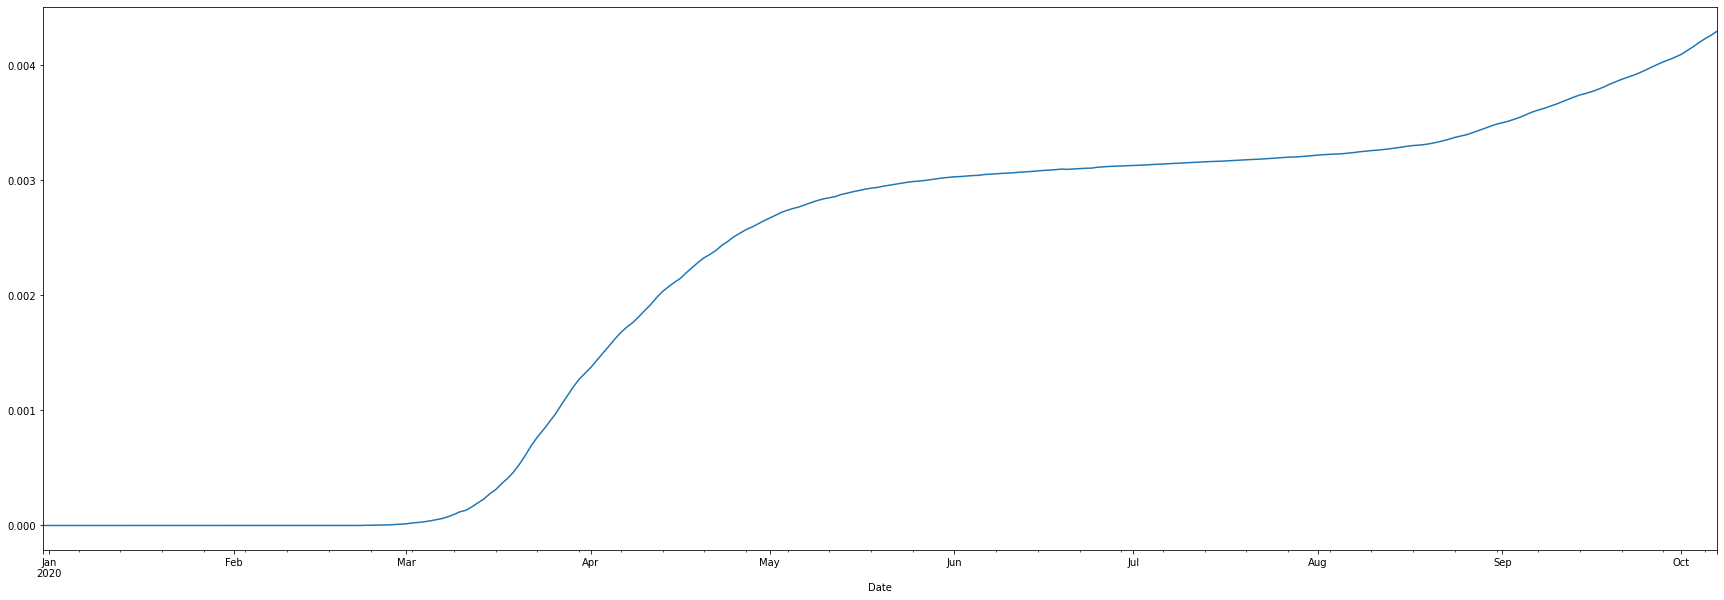

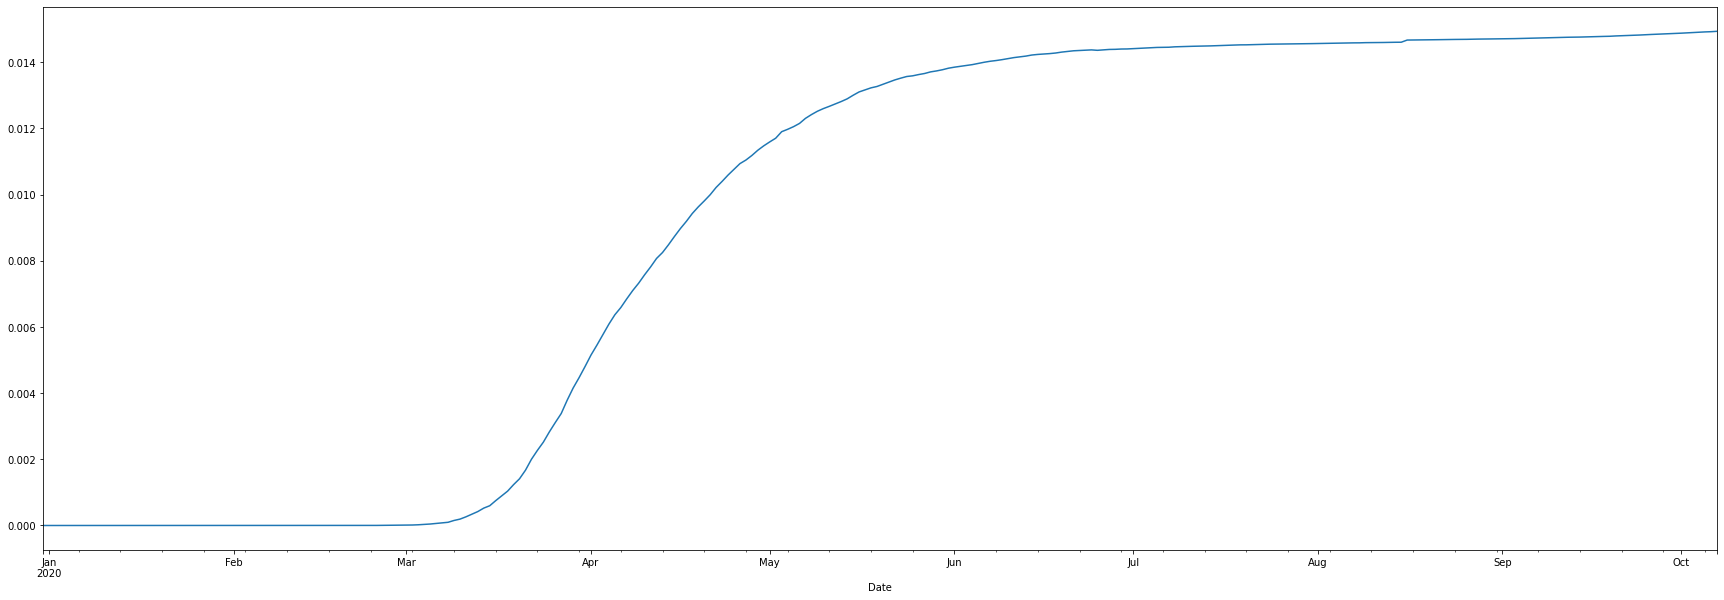

New Zealand


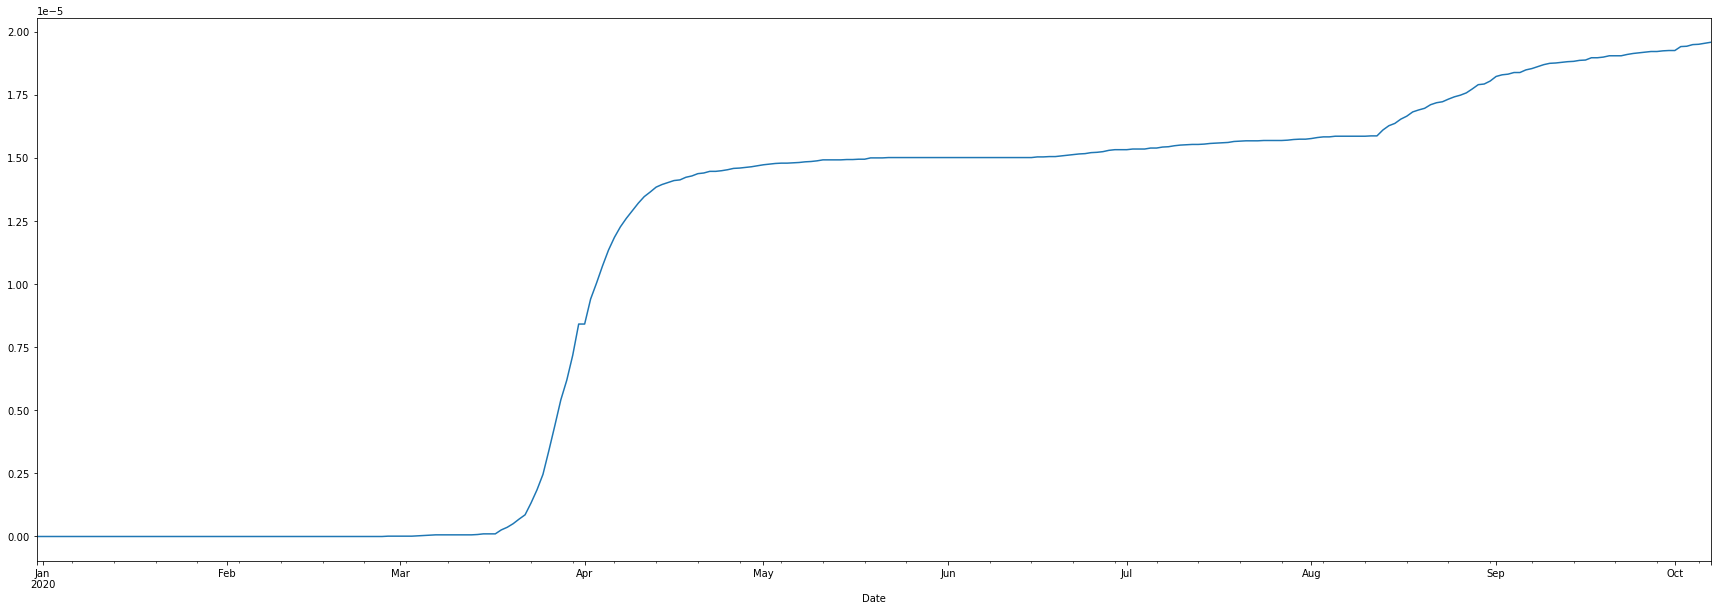

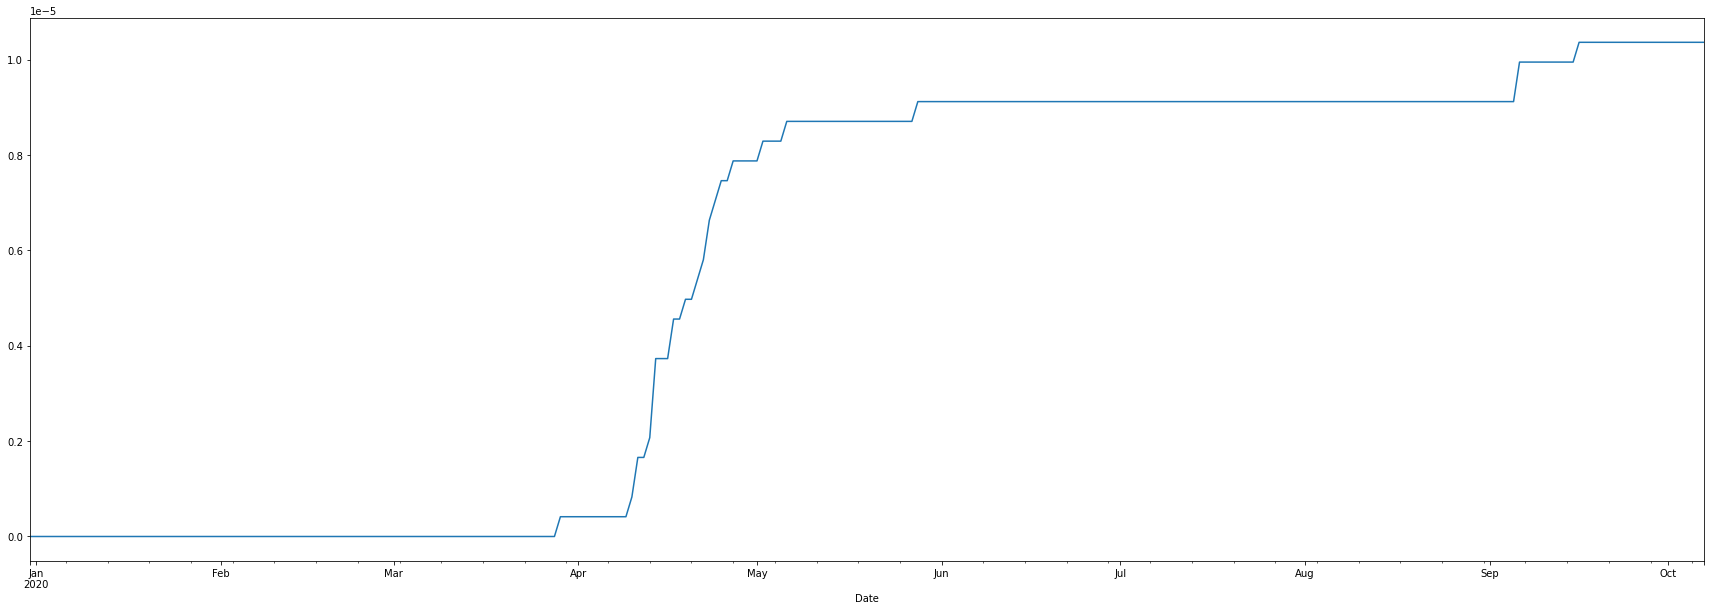

Russia


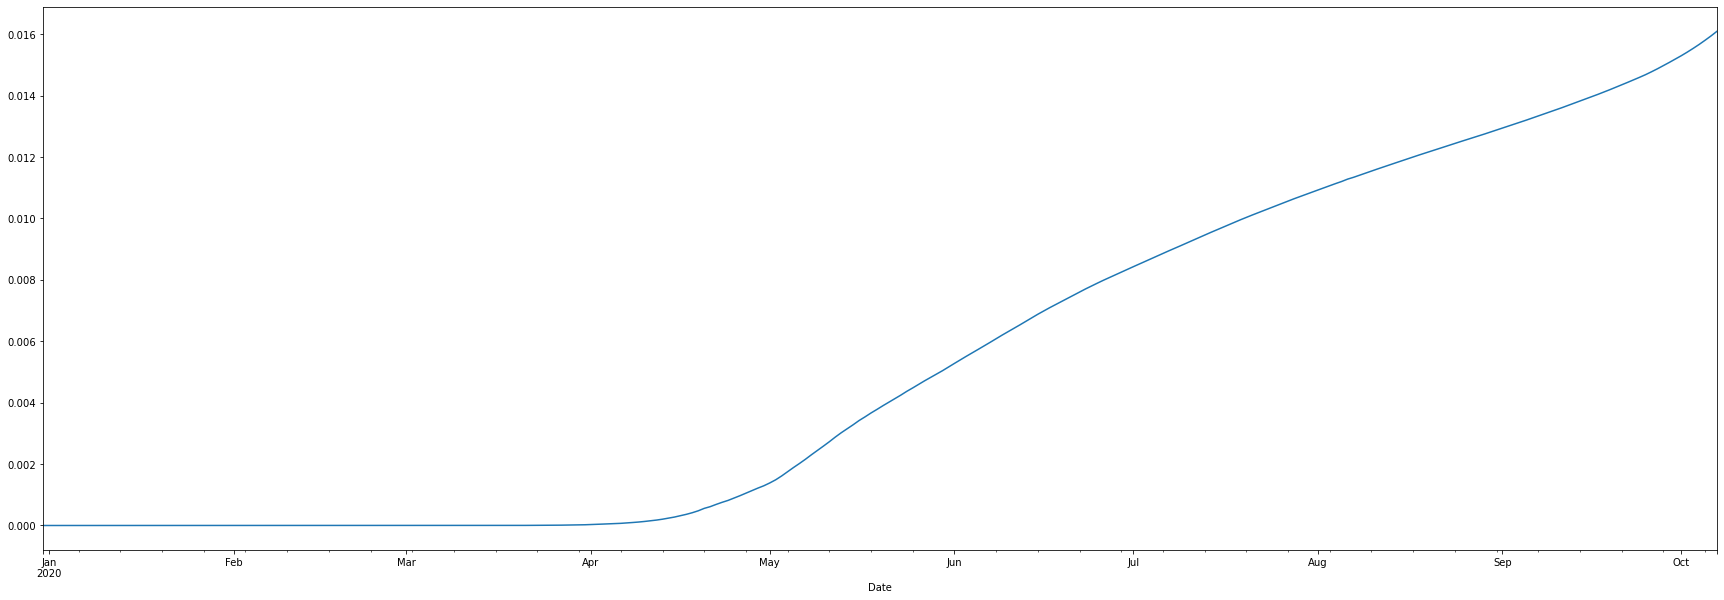

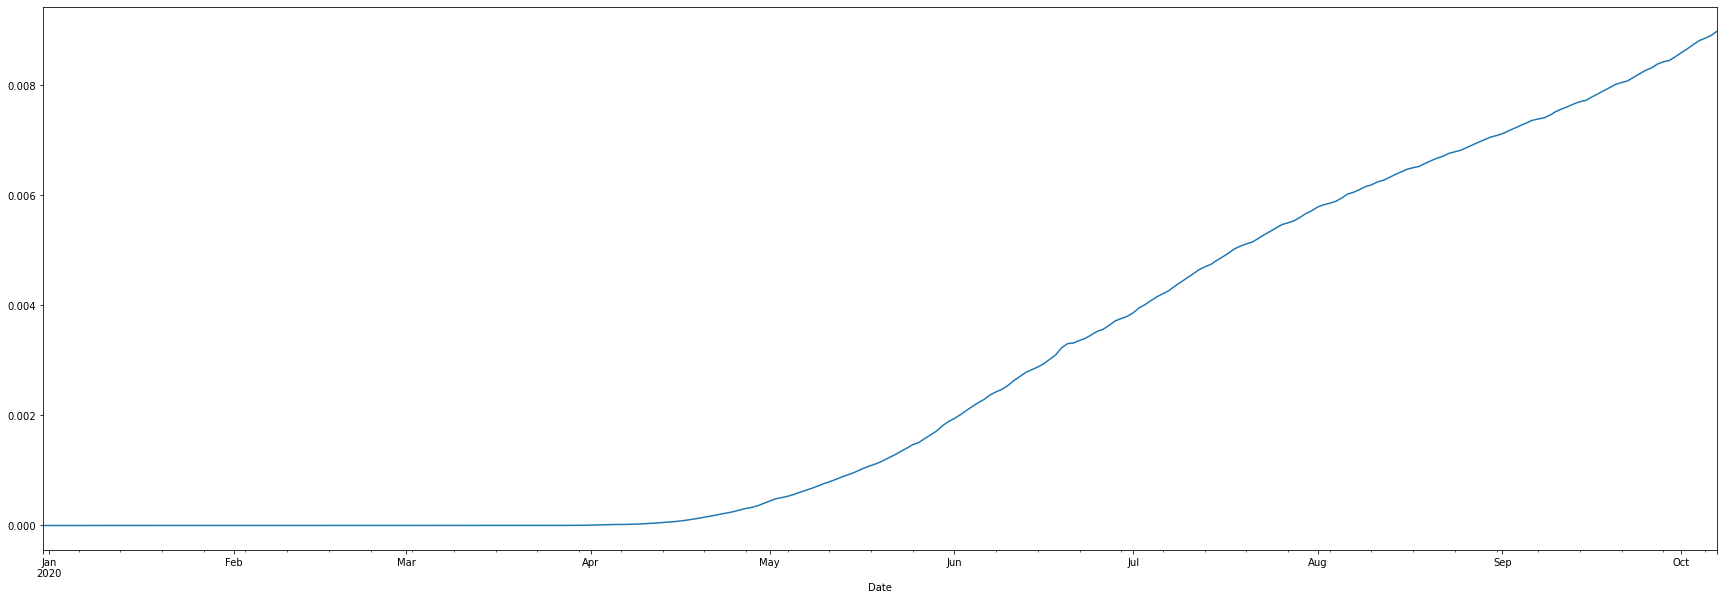

South Africa


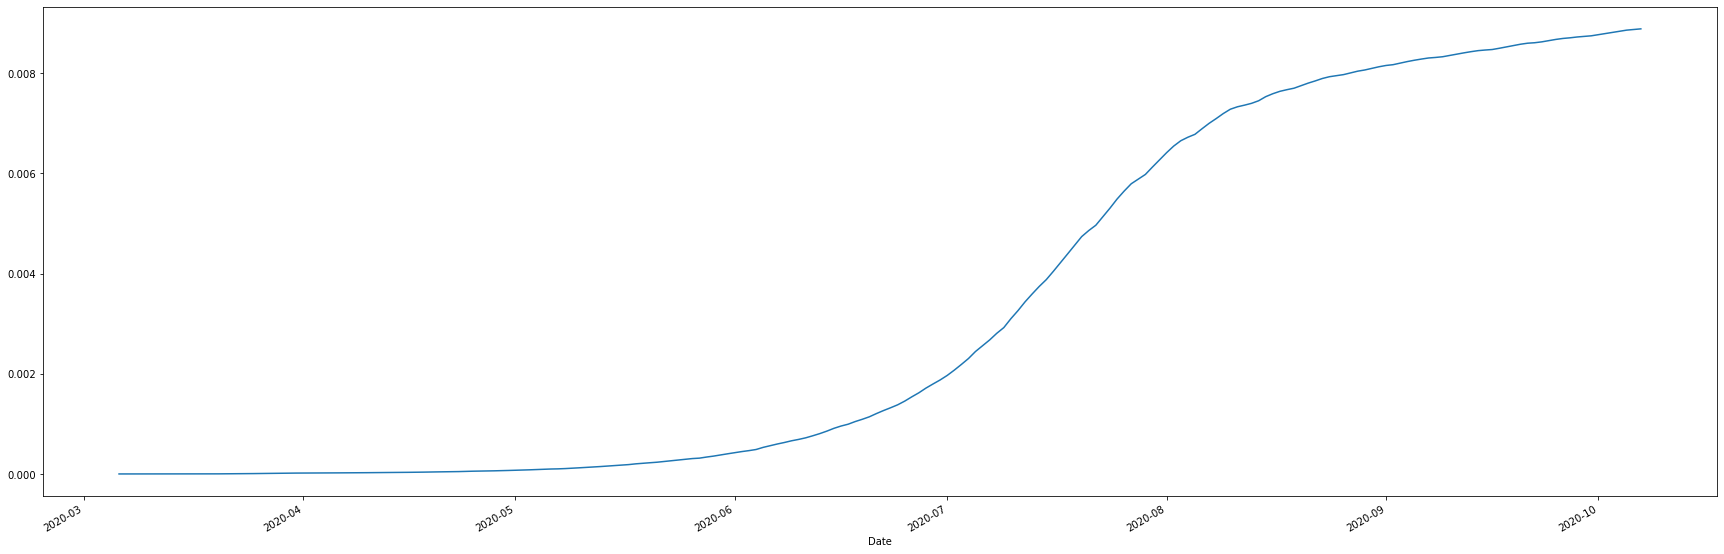

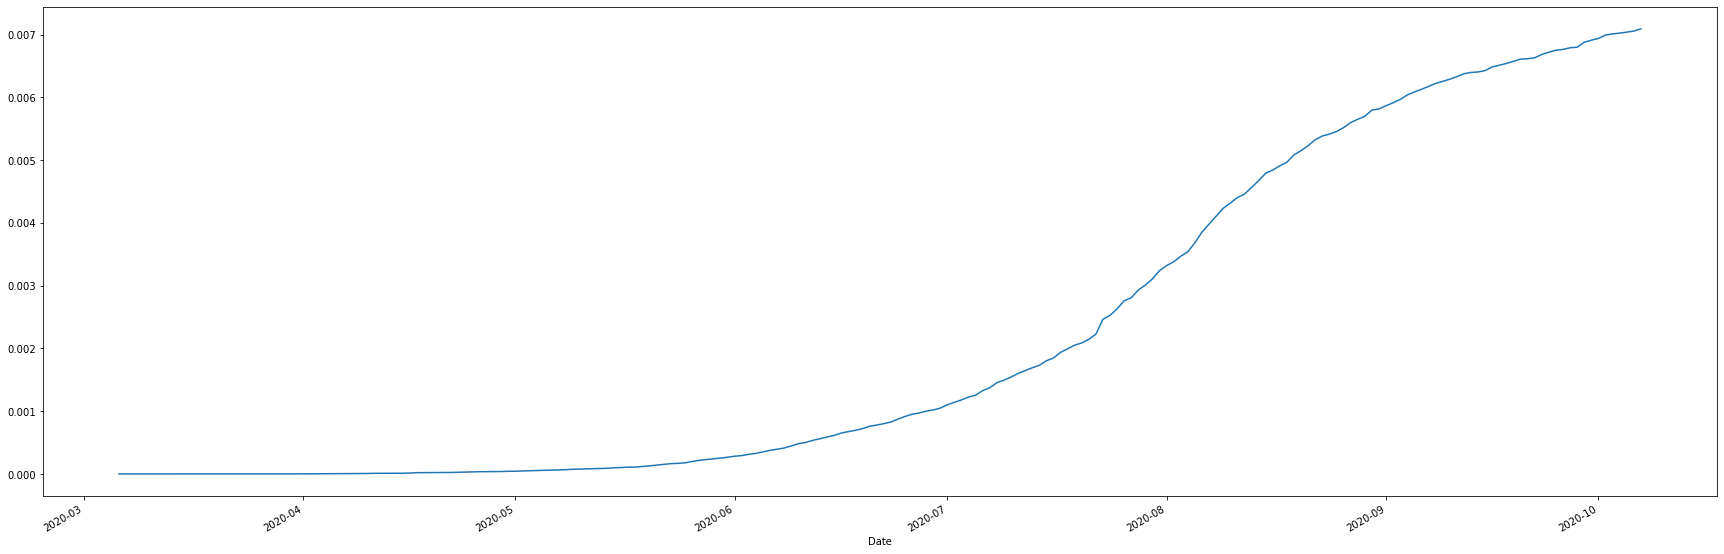

Sweden


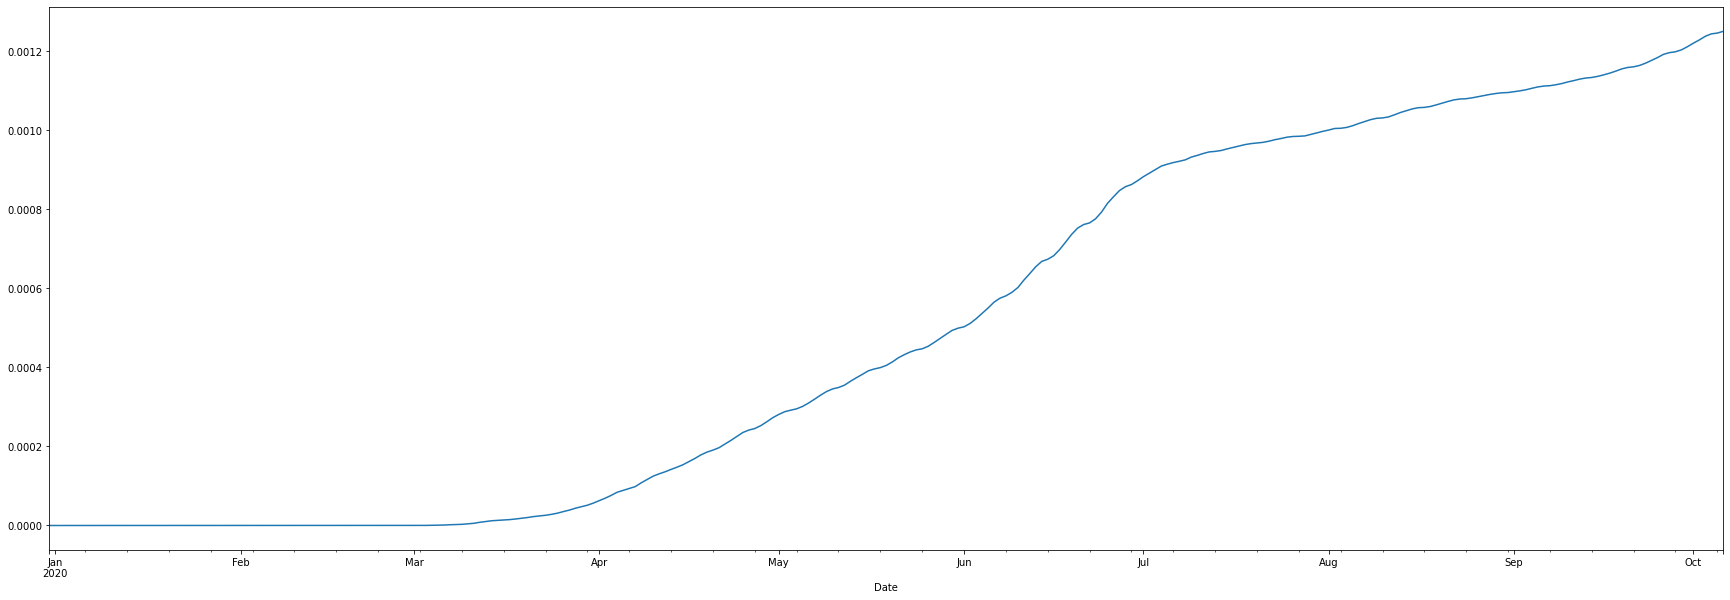

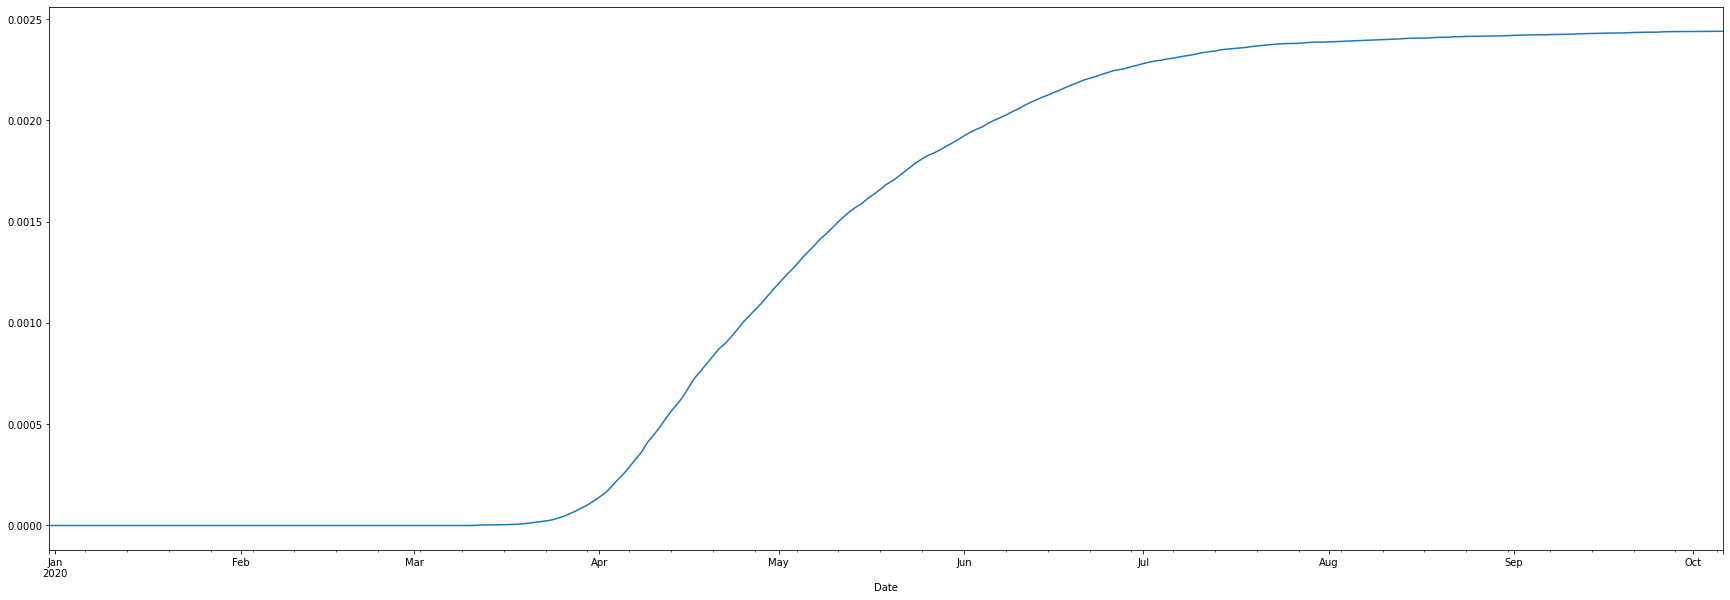

United Kingdom


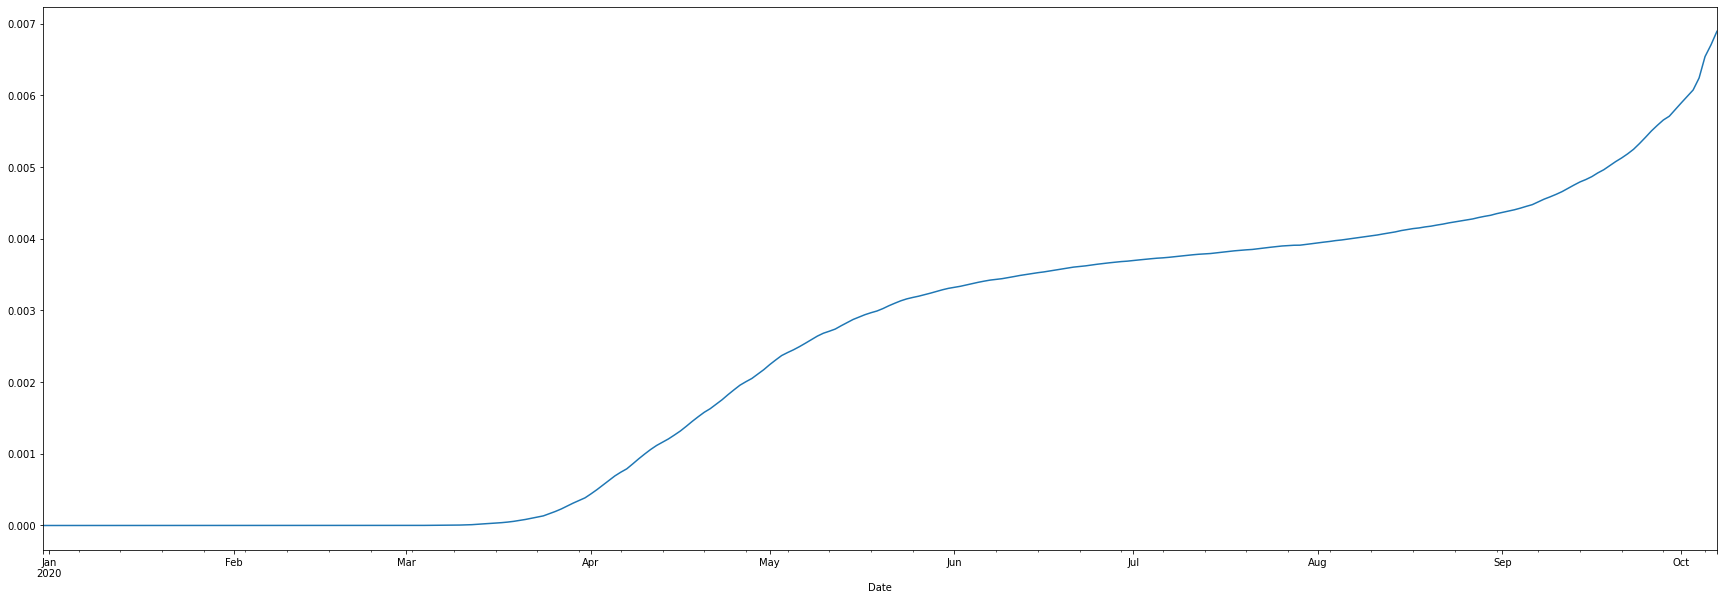

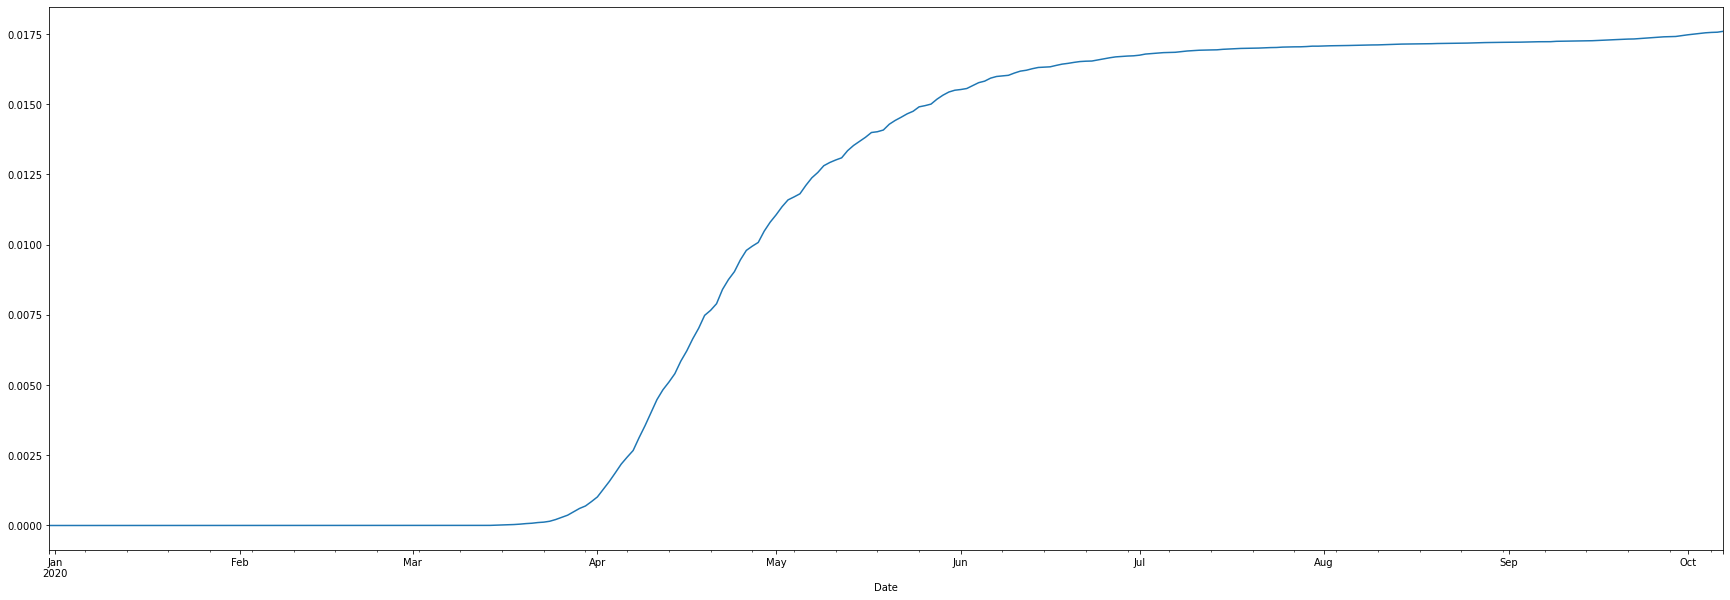

United States


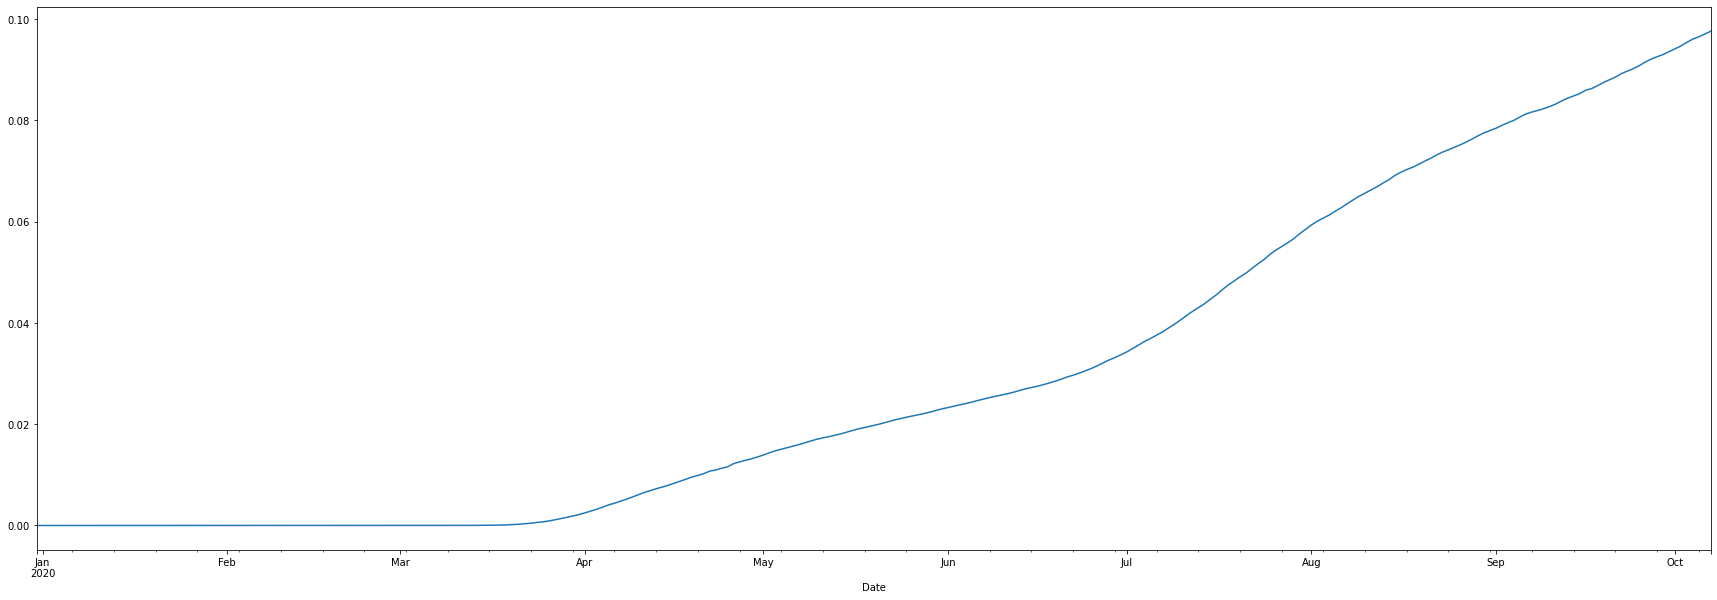

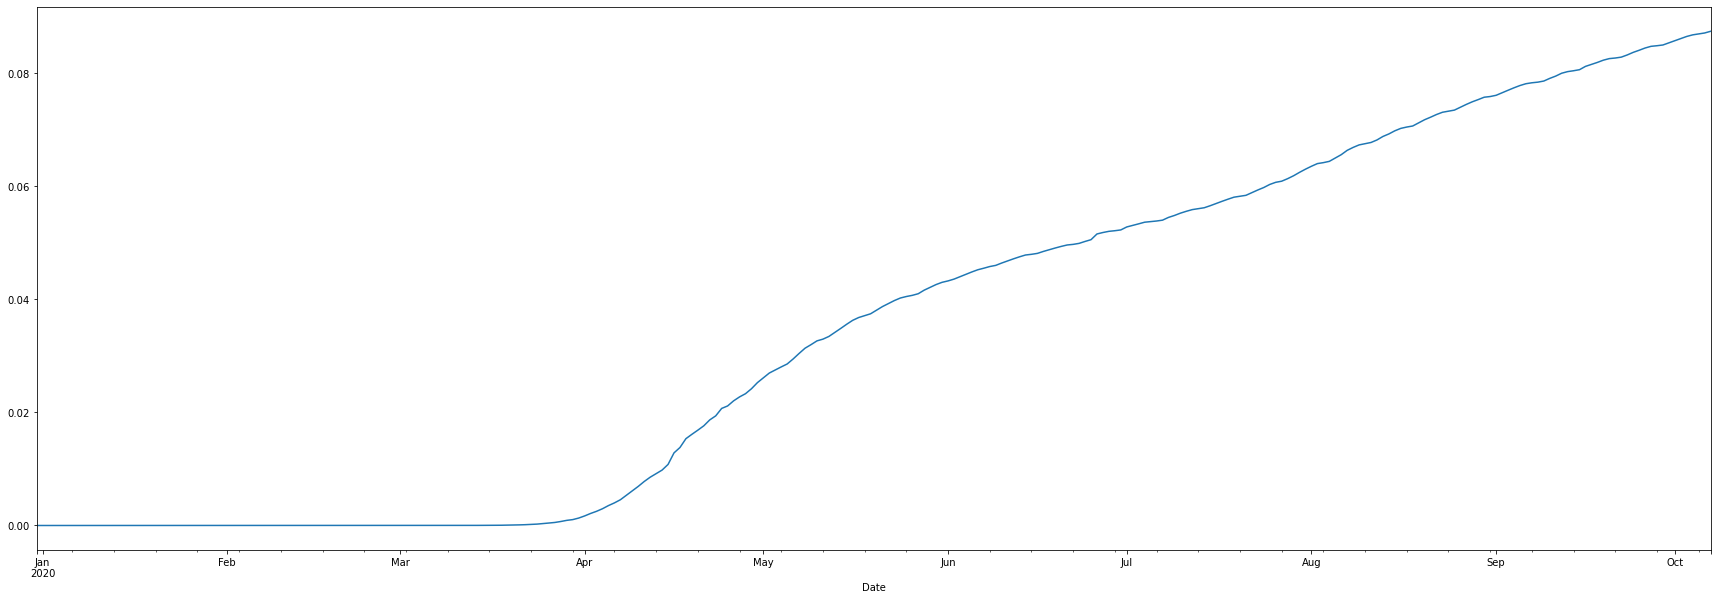

In [69]:
for country in countries.index:
    covid19_country=covid19[covid19['Countries']==country].set_index('Date')
    print(country)
    plt.figure(figsize=(30,10)) 
    covid19_country['normalized_cases'].plot()
    #covid19_country['Score 2020'].plot()
    plt.show()
    plt.figure(figsize=(30,10))
    covid19_country['normalized_deaths'].plot()
    #covid19_country['Score 2020'].plot()
    plt.show()

In [141]:
for country in countries.index:
    print(country)
    print(covid19[covid19['Countries']==country]['Population'])
    

Brazil
5424    211049527.0
5425    211049527.0
5426    211049527.0
5427    211049527.0
5428    211049527.0
           ...     
5701    211049527.0
5702    211049527.0
5703    211049527.0
5704    211049527.0
5705    211049527.0
Name: Population, Length: 282, dtype: float64
India
17385    1.366418e+09
17386    1.366418e+09
17387    1.366418e+09
17388    1.366418e+09
17389    1.366418e+09
             ...     
17662    1.366418e+09
17663    1.366418e+09
17664    1.366418e+09
17665    1.366418e+09
17666    1.366418e+09
Name: Population, Length: 282, dtype: float64
Iran
17949    82913906.0
17950    82913906.0
17951    82913906.0
17952    82913906.0
17953    82913906.0
            ...    
18226    82913906.0
18227    82913906.0
18228    82913906.0
18229    82913906.0
18230    82913906.0
Name: Population, Length: 282, dtype: float64
Italy
19077    60297396.0
19078    60297396.0
19079    60297396.0
19080    60297396.0
19081    60297396.0
            ...    
19354    60297396.0
19355    6029739

Text(0, 0.5, 'Freedom of press score')

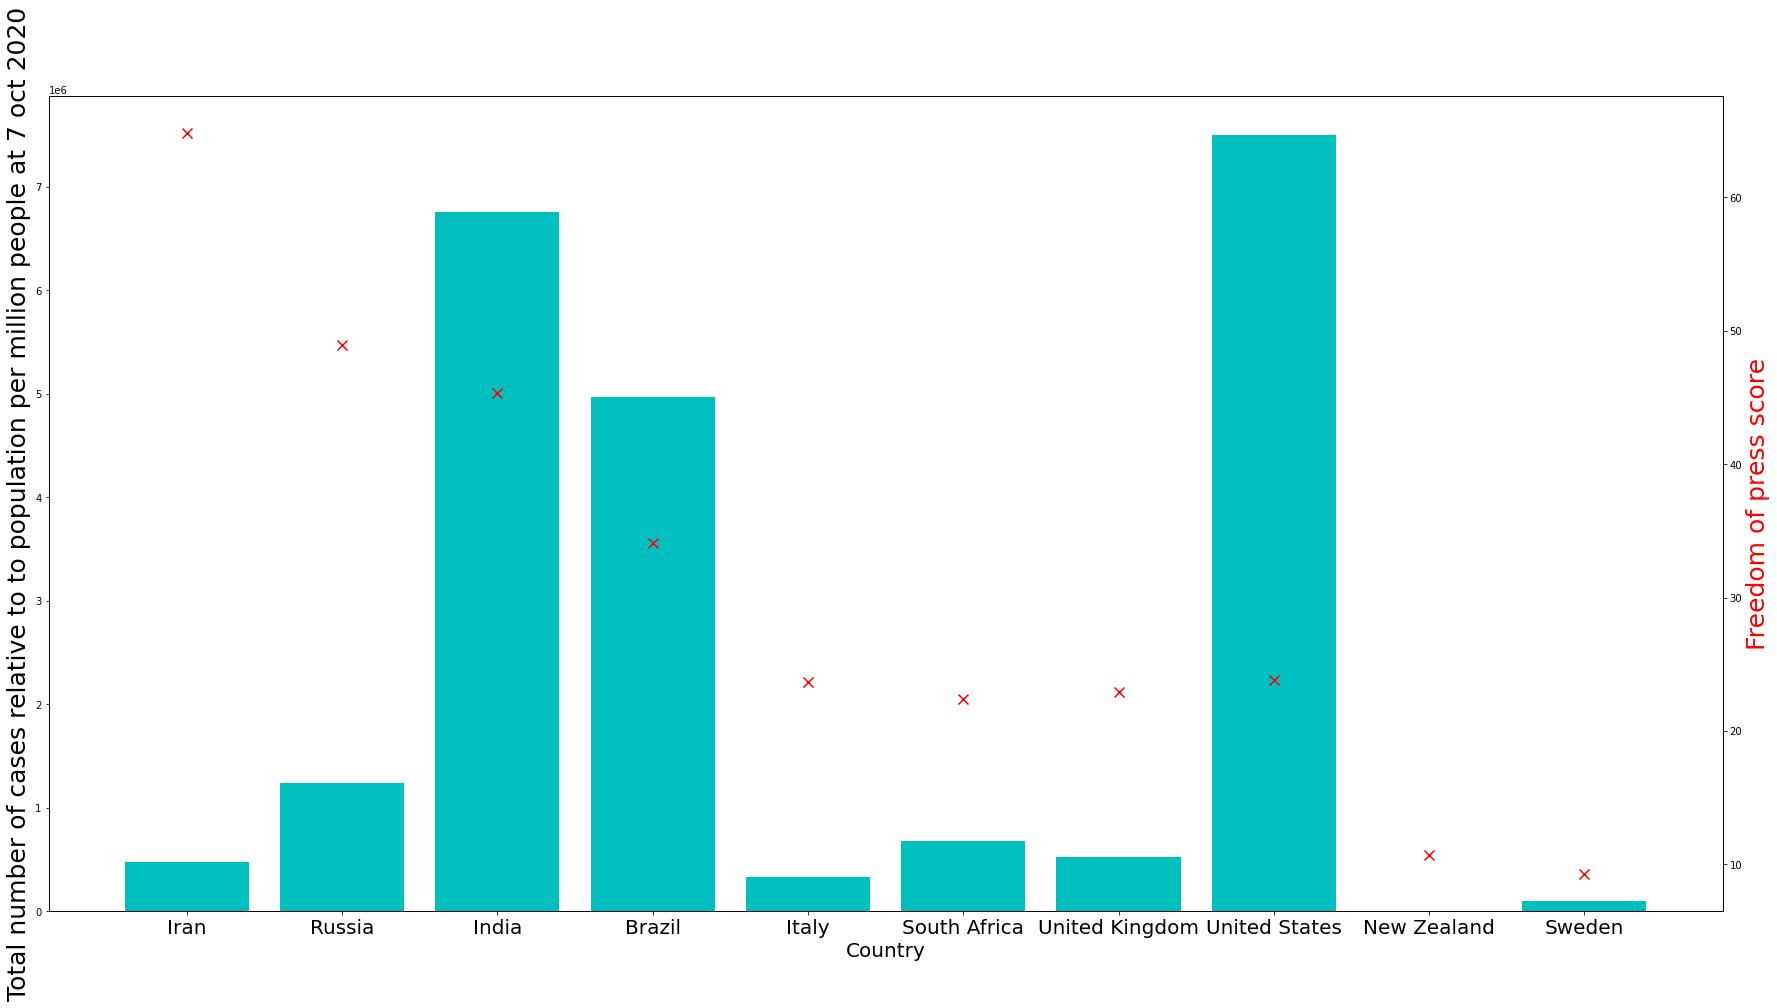

In [147]:
total_pop=[479825/82.913906,1237504/144.373535,6757131/1366.418,4969141/211.049527,330263/60.297396,683242/58.558270,530113/66.834405,7501612/328.239523,1505/4.917000,96145/10.285453]
total=[479825,1237504,6757131,4969141,330263,683242,530113,7501612,1505,96145]
score=[64.81,48.92,45.33,34.05,23.69,22.41,22.93,23.85,10.69,9.25]
coun=['Iran','Russia', 'India','Brazil', 'Italy', 'South Africa', 'United Kingdom', 'United States','New Zealand', 'Sweden']
fig,ax = plt.subplots(figsize=(30,15))
ax.bar(coun, total, color='c')
ax.set_xlabel("Country",fontsize=20)
plt.xticks(fontsize=20)
ax.set_ylabel("Total number of cases relative to to population per million people at 7 oct 2020",fontsize=25)
ax2=ax.twinx()
ax2.scatter(coun, score,marker='x', color='r', s=100)
ax2.set_ylabel("Freedom of press score",fontsize=25,color='r')
#for tickLabel in plt.gca().xaxis.get_ticklabels():
#  if tickLabel.get_text() in ['A', 'C']:
#    tickLabel.set_color('red')

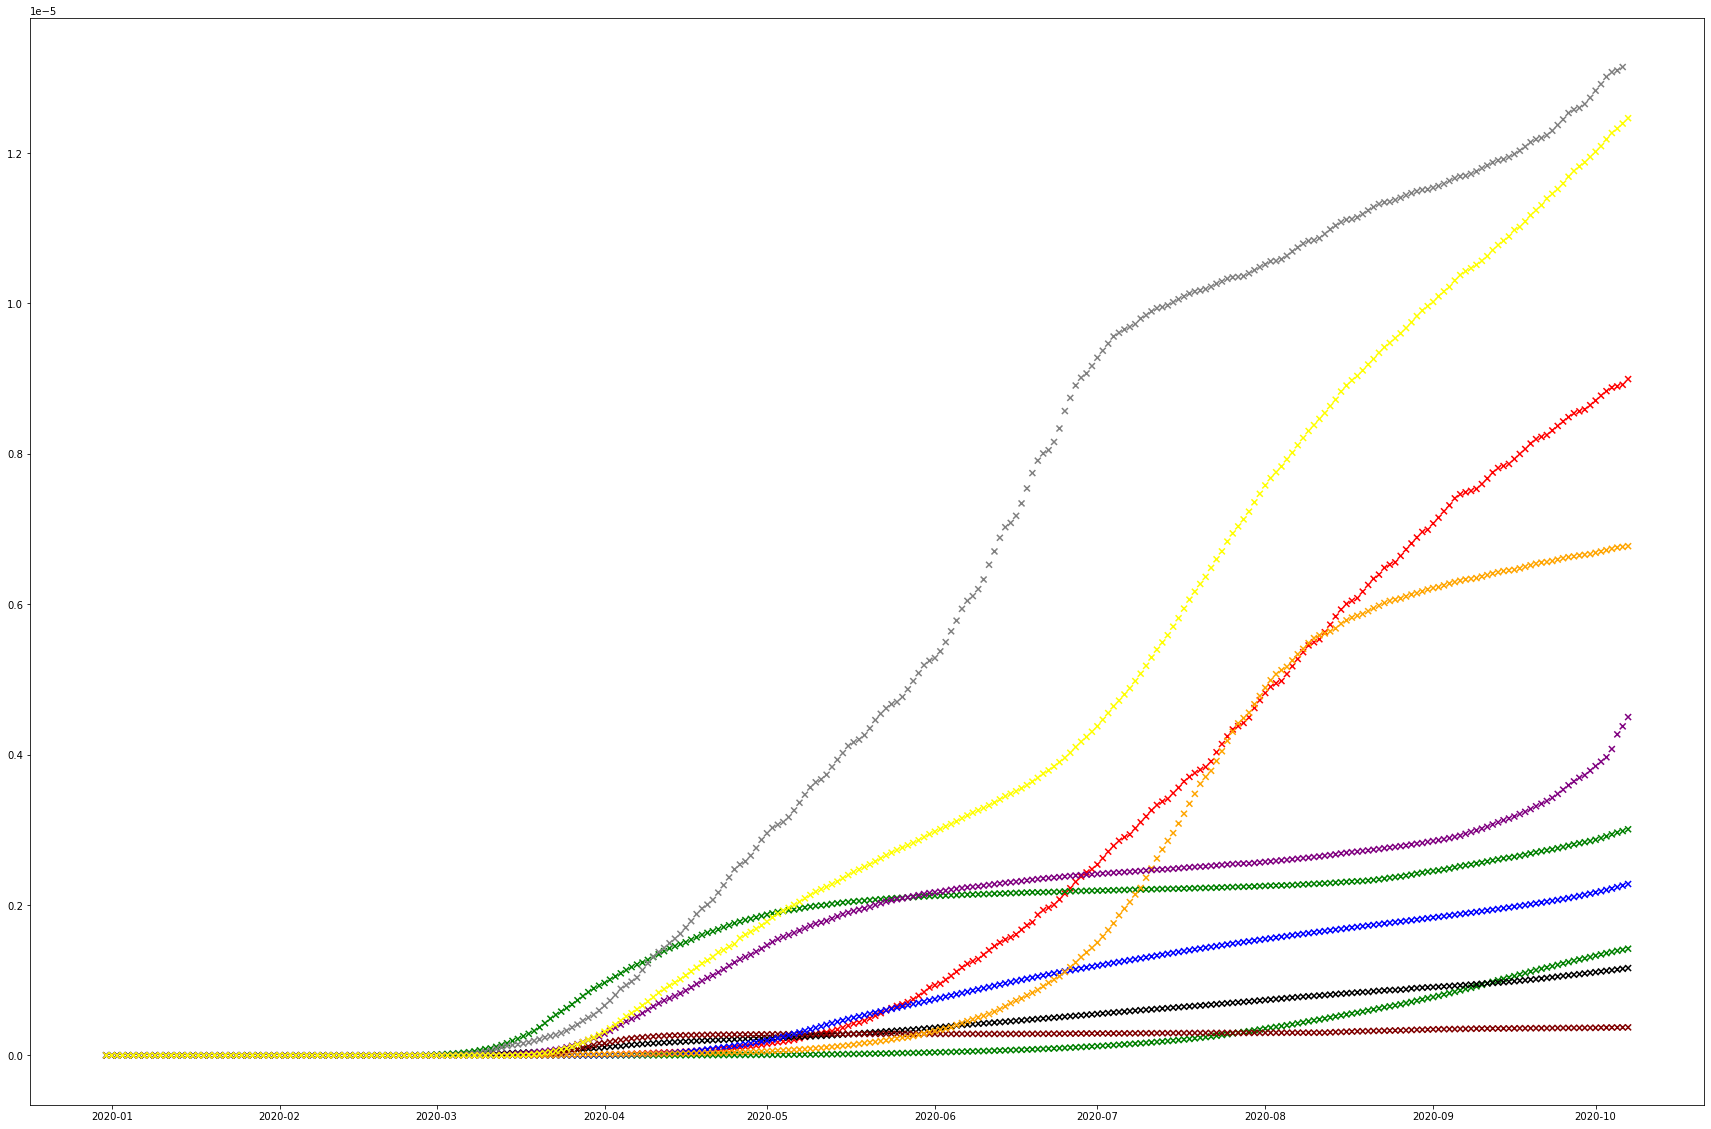

In [87]:
covid19['cases_pond_by_score_by_pop']=covid19['normalized_cases']/(covid19['Score 2020']*covid19['Population'])*1000000 #per million inhabitants
covid19['deaths_pond_by_score_by_pop']=covid19['normalized_deaths']/(covid19['Score 2020']*covid19['Population'])*1000000
colors_map={'United States':'yellow', 'Brazil':'red', 'Russia':'blue', 'India':'green', 'United Kingdom':'purple', 'Italy':'green', 'New Zealand':'maroon', 'Sweden':'grey', 'South Africa':'orange', 'Iran':'black'}
colors=covid19['Country'].map(colors_map)
plt.figure(figsize=(30,20)) 
plt.scatter(y=covid19['cases_pond_by_score_by_pop'],x=covid19['Date'],c=colors,marker='x')
